# Three example datasets for linear modeling

In Lecture XXI of Wittgenstein’s “Lectures on the Foundations of
Mathematics” we find this diagram and quote:

![Entrails of a
Goose](attachment:wittgenstein.png "Entrails of a Goose")

In the same passage, he goes on to say,

> “A use of language has normally what we might call a point. This is
> immensely important. Although it’s true this is a matter of degree,
> and we can’t just say where it ends.”

When we run a regression, we must have a point. Otherwise we are just
looking at goose entrails.
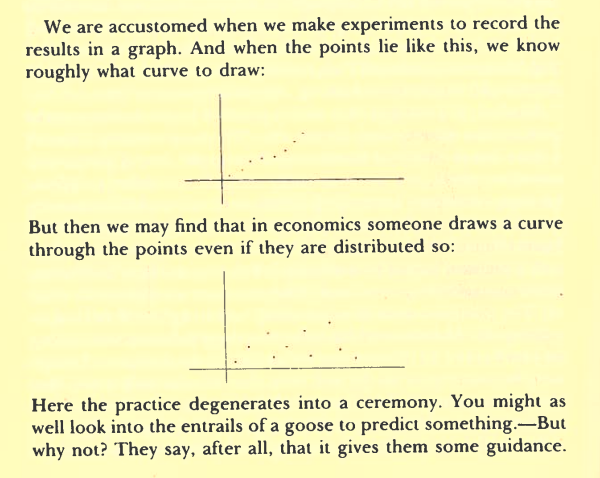

In [1]:
library(tidyverse)
library(gridExtra)
library(car)

options(repr.plot.width = 15, repr.plot.height = 8, repr.plot.res = 300)


── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dply

# Spotify data

Almost 30,000 Songs from the Spotify API with black-box machine learning
quantifications of musical features.

https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

In [2]:
setwd("/home/rgiordan/Documents/git_repos/stat151a_website")
spotify_df <- read.csv("datasets/spotify_songs.csv")
head(spotify_df)
print(sprintf("%d rows in the dataframe.", nrow(spotify_df)))
print(names(spotify_df))

[1] "32833 rows in the dataframe."
 [1] "track_id"                 "track_name"              
 [3] "track_artist"             "track_popularity"        
 [5] "track_album_id"           "track_album_name"        
 [7] "track_album_release_date" "playlist_name"           
 [9] "playlist_id"              "playlist_genre"          
[11] "playlist_subgenre"        "danceability"            
[13] "energy"                   "key"                     
[15] "loudness"                 "mode"                    
[17] "speechiness"              "acousticness"            
[19] "instrumentalness"         "liveness"                
[21] "valence"                  "tempo"                   
[23] "duration_ms"             

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2703 rows containing non-finite values (`stat_bin()`).”

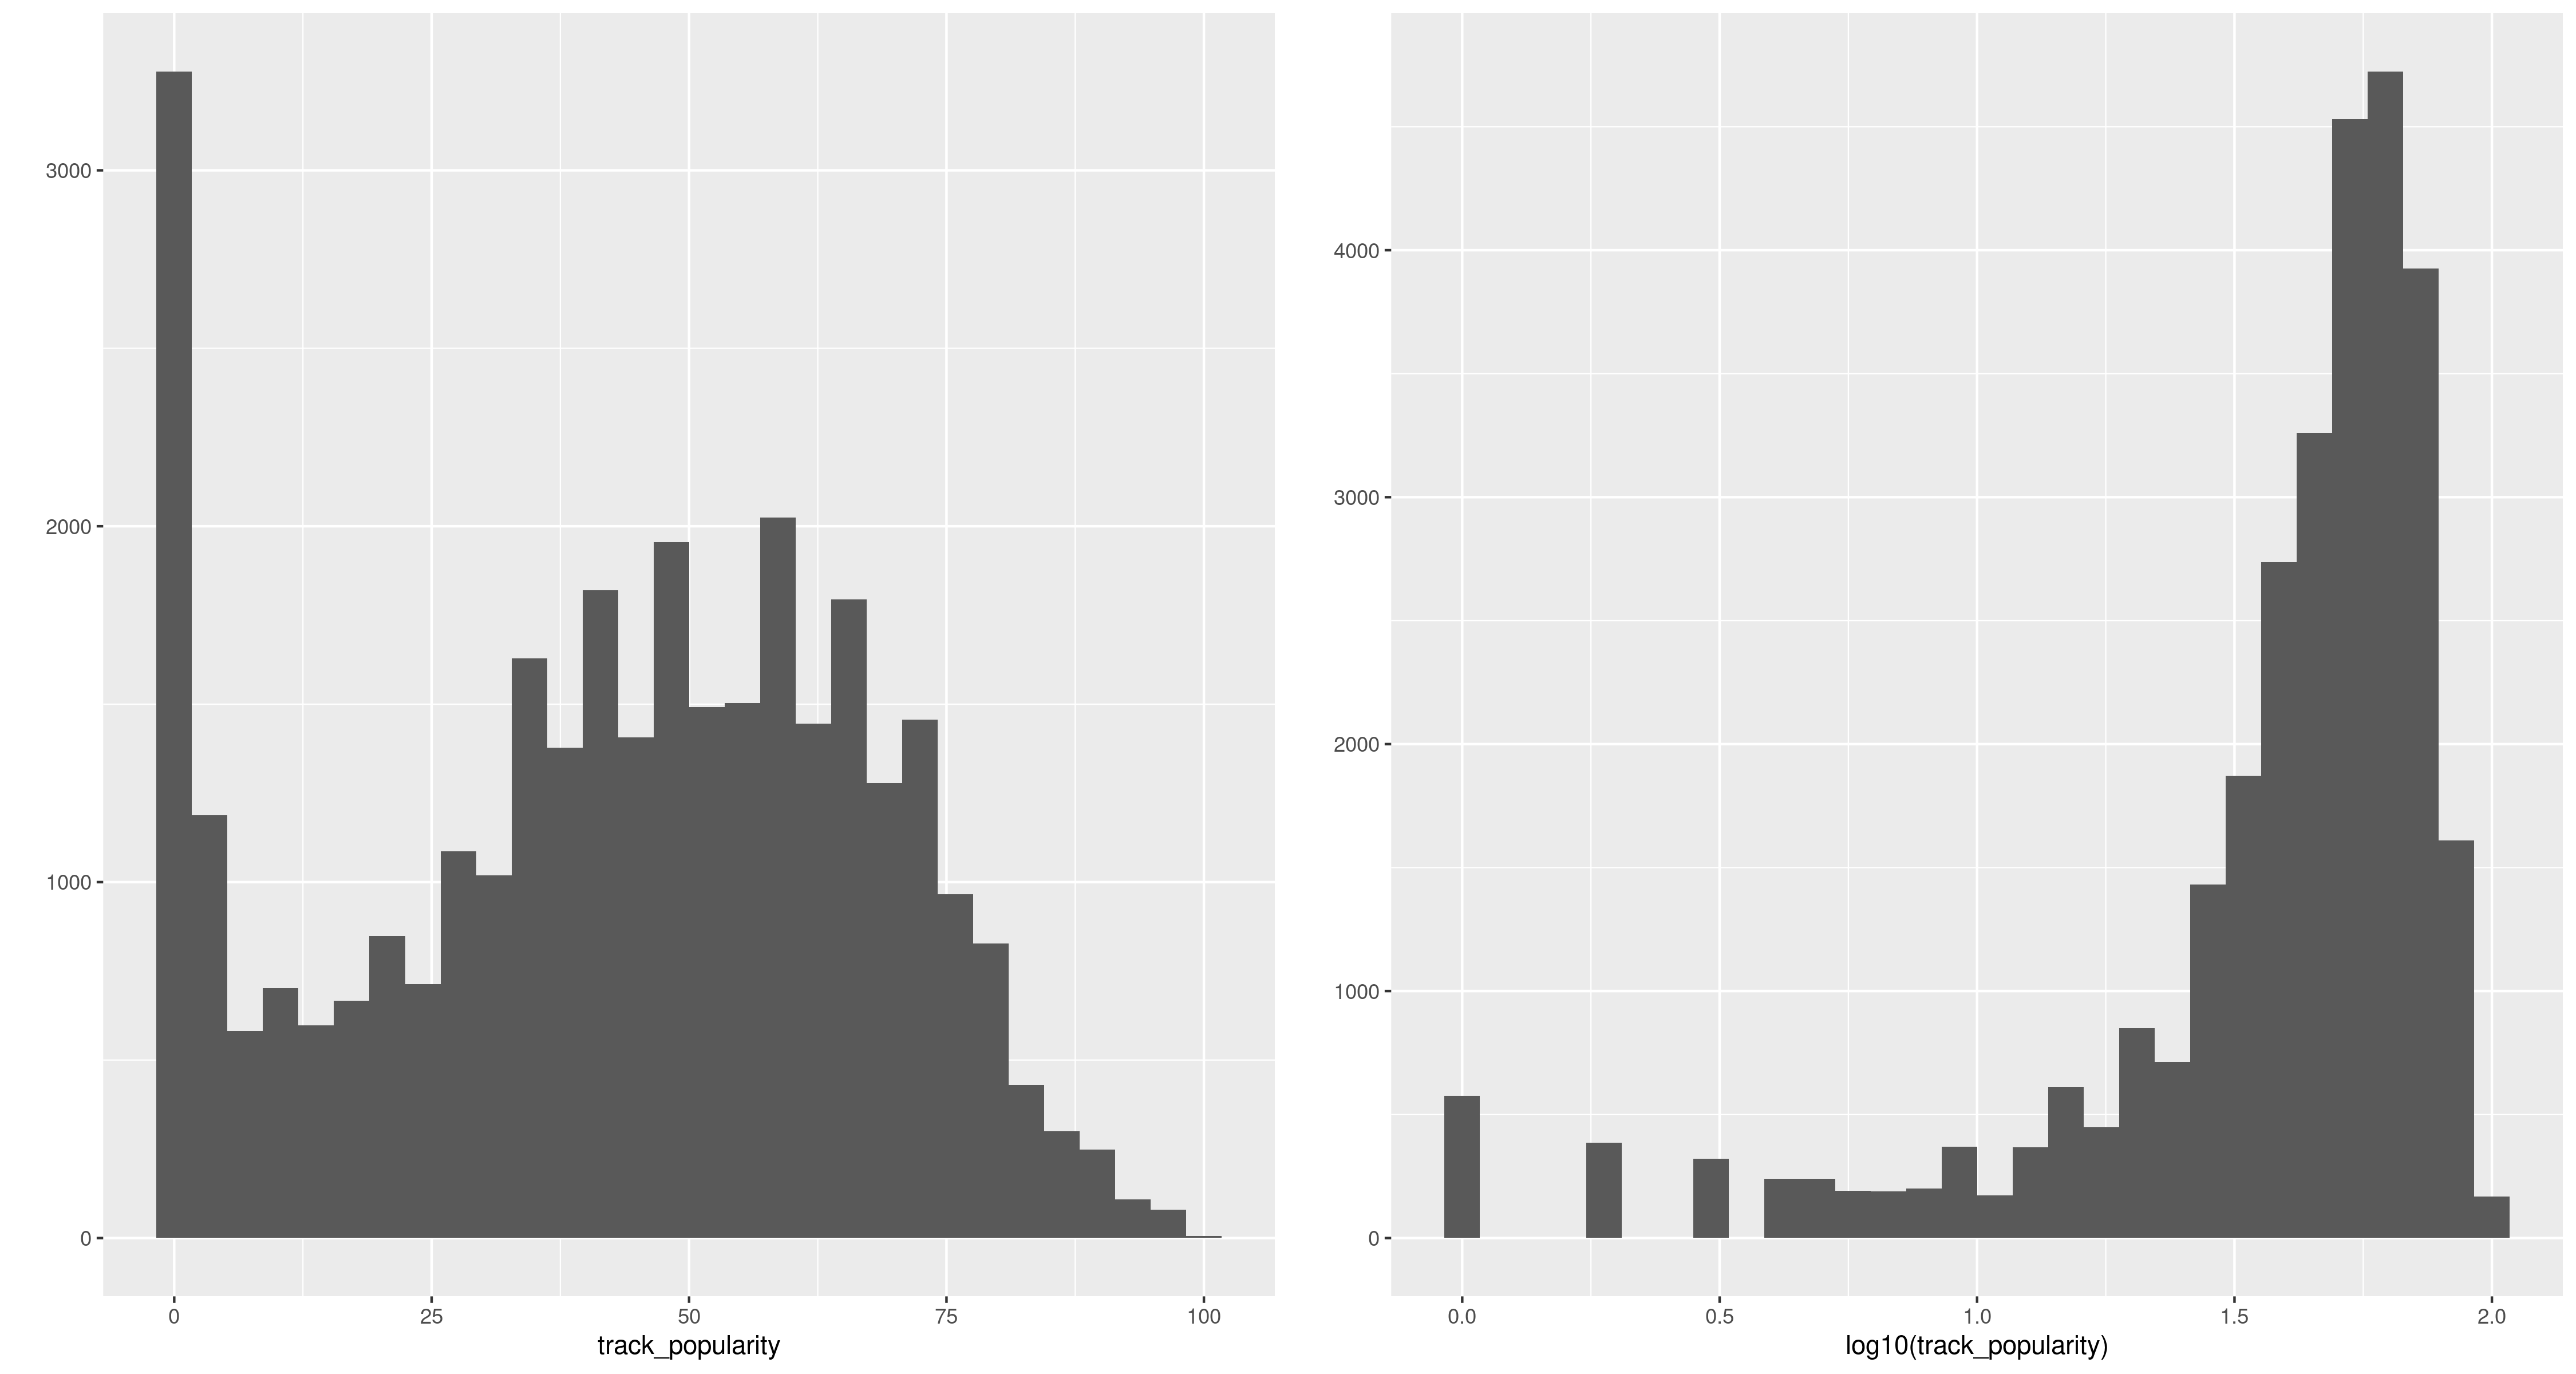

In [3]:
grid.arrange(
    qplot(x=track_popularity, geom="histogram", data=spotify_df),
    qplot(x=log10(track_popularity), geom="histogram", data=spotify_df), ncol=2)

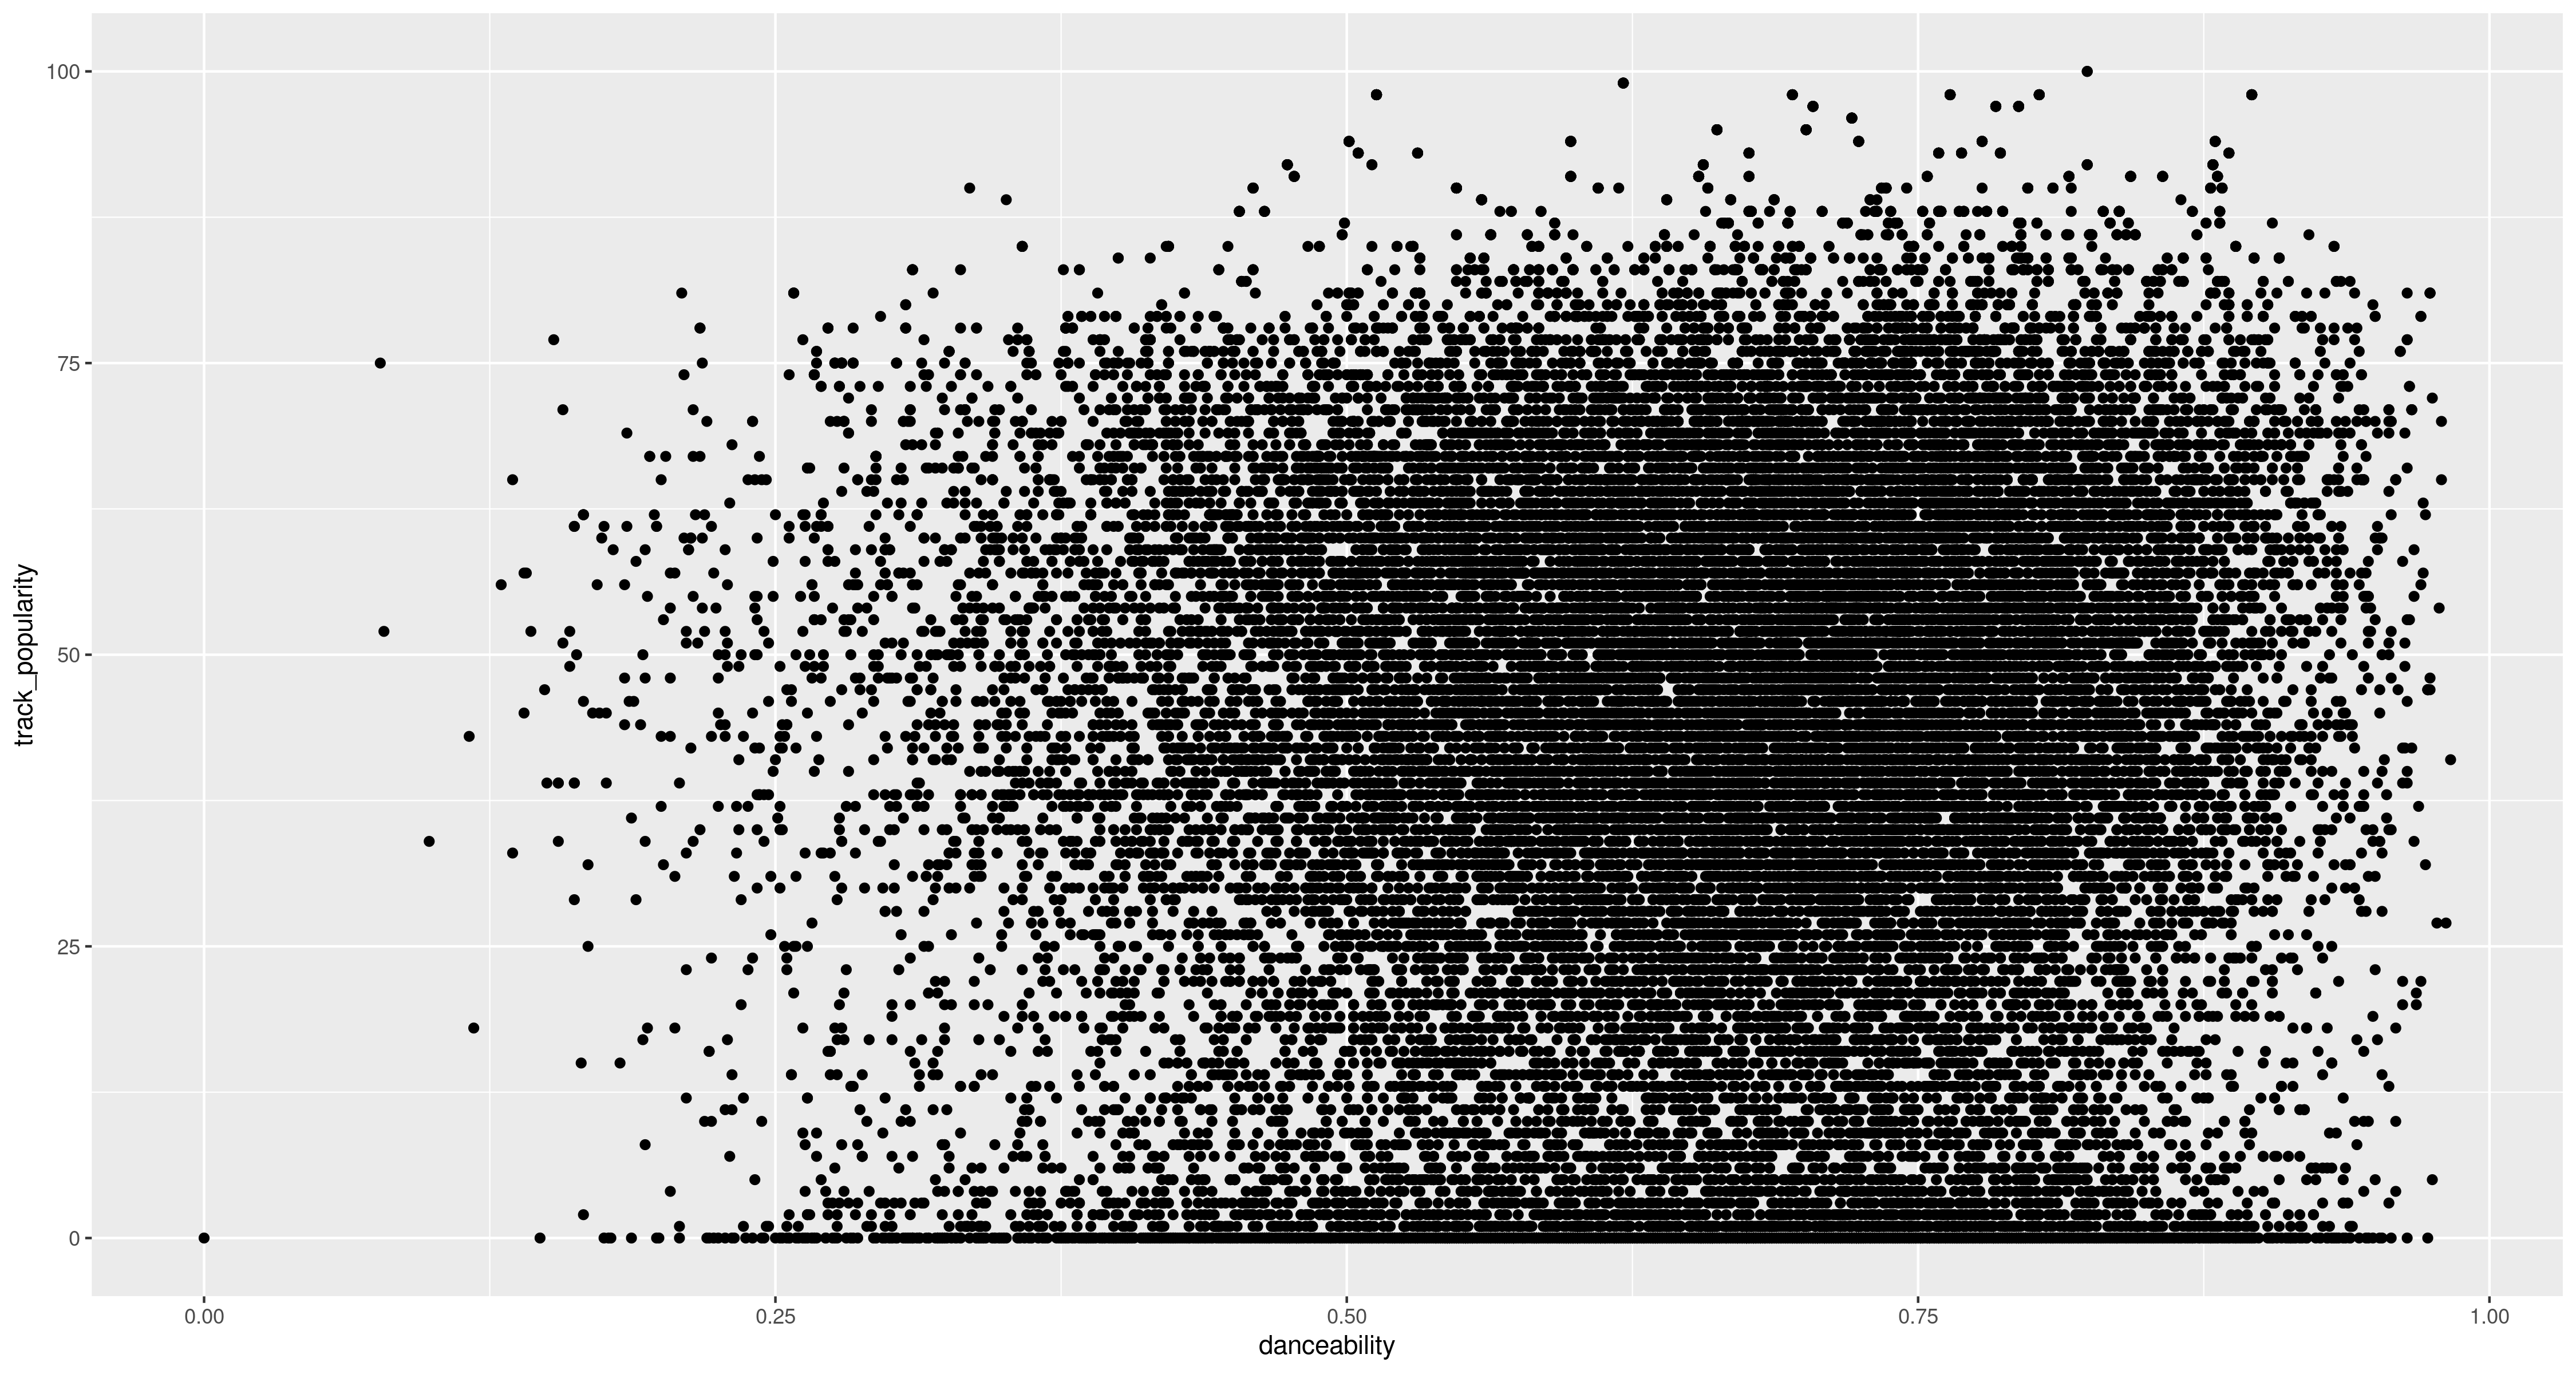

In [4]:
ggplot(spotify_df) + geom_point(aes(y=track_popularity, x=danceability))

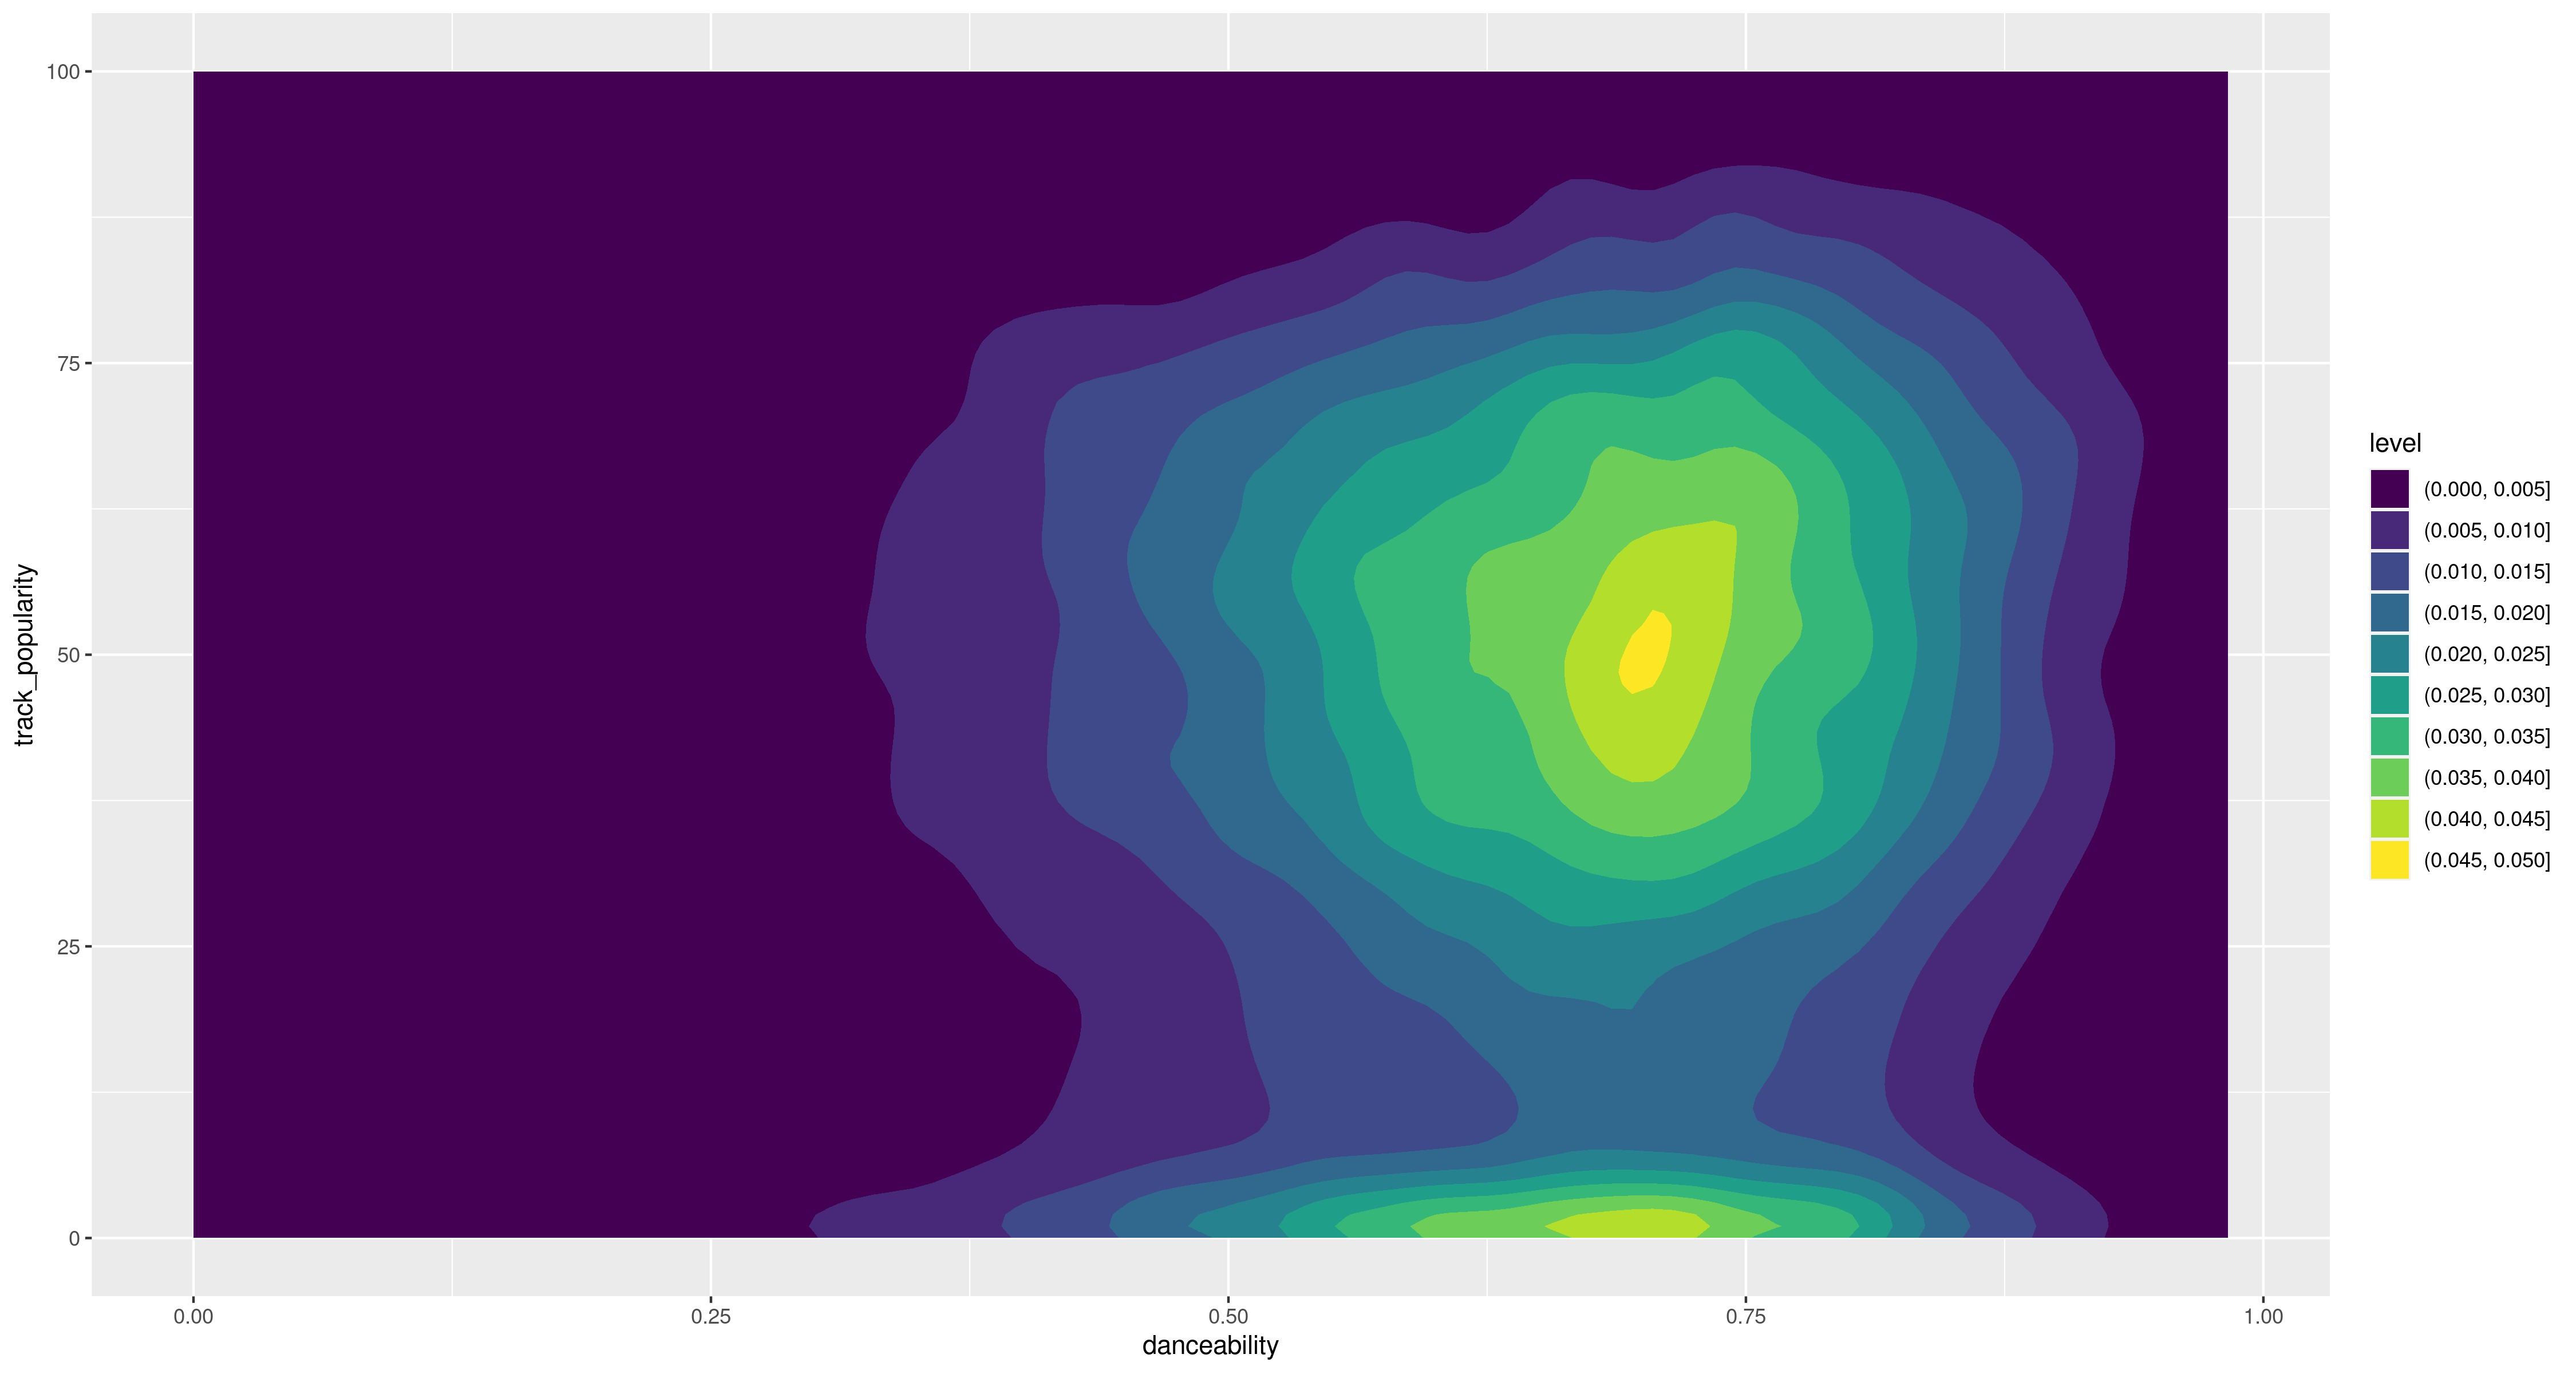

In [5]:
ggplot(spotify_df) + geom_density_2d_filled(aes(y=track_popularity, x=danceability))


Call:
lm(formula = track_popularity ~ danceability, data = spotify_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-46.024 -18.415   2.934  19.480  57.105 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   35.1757     0.6361   55.30   <2e-16 ***
danceability  11.1497     0.9484   11.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.93 on 32831 degrees of freedom
Multiple R-squared:  0.004192,  Adjusted R-squared:  0.004162 
F-statistic: 138.2 on 1 and 32831 DF,  p-value: < 2.2e-16


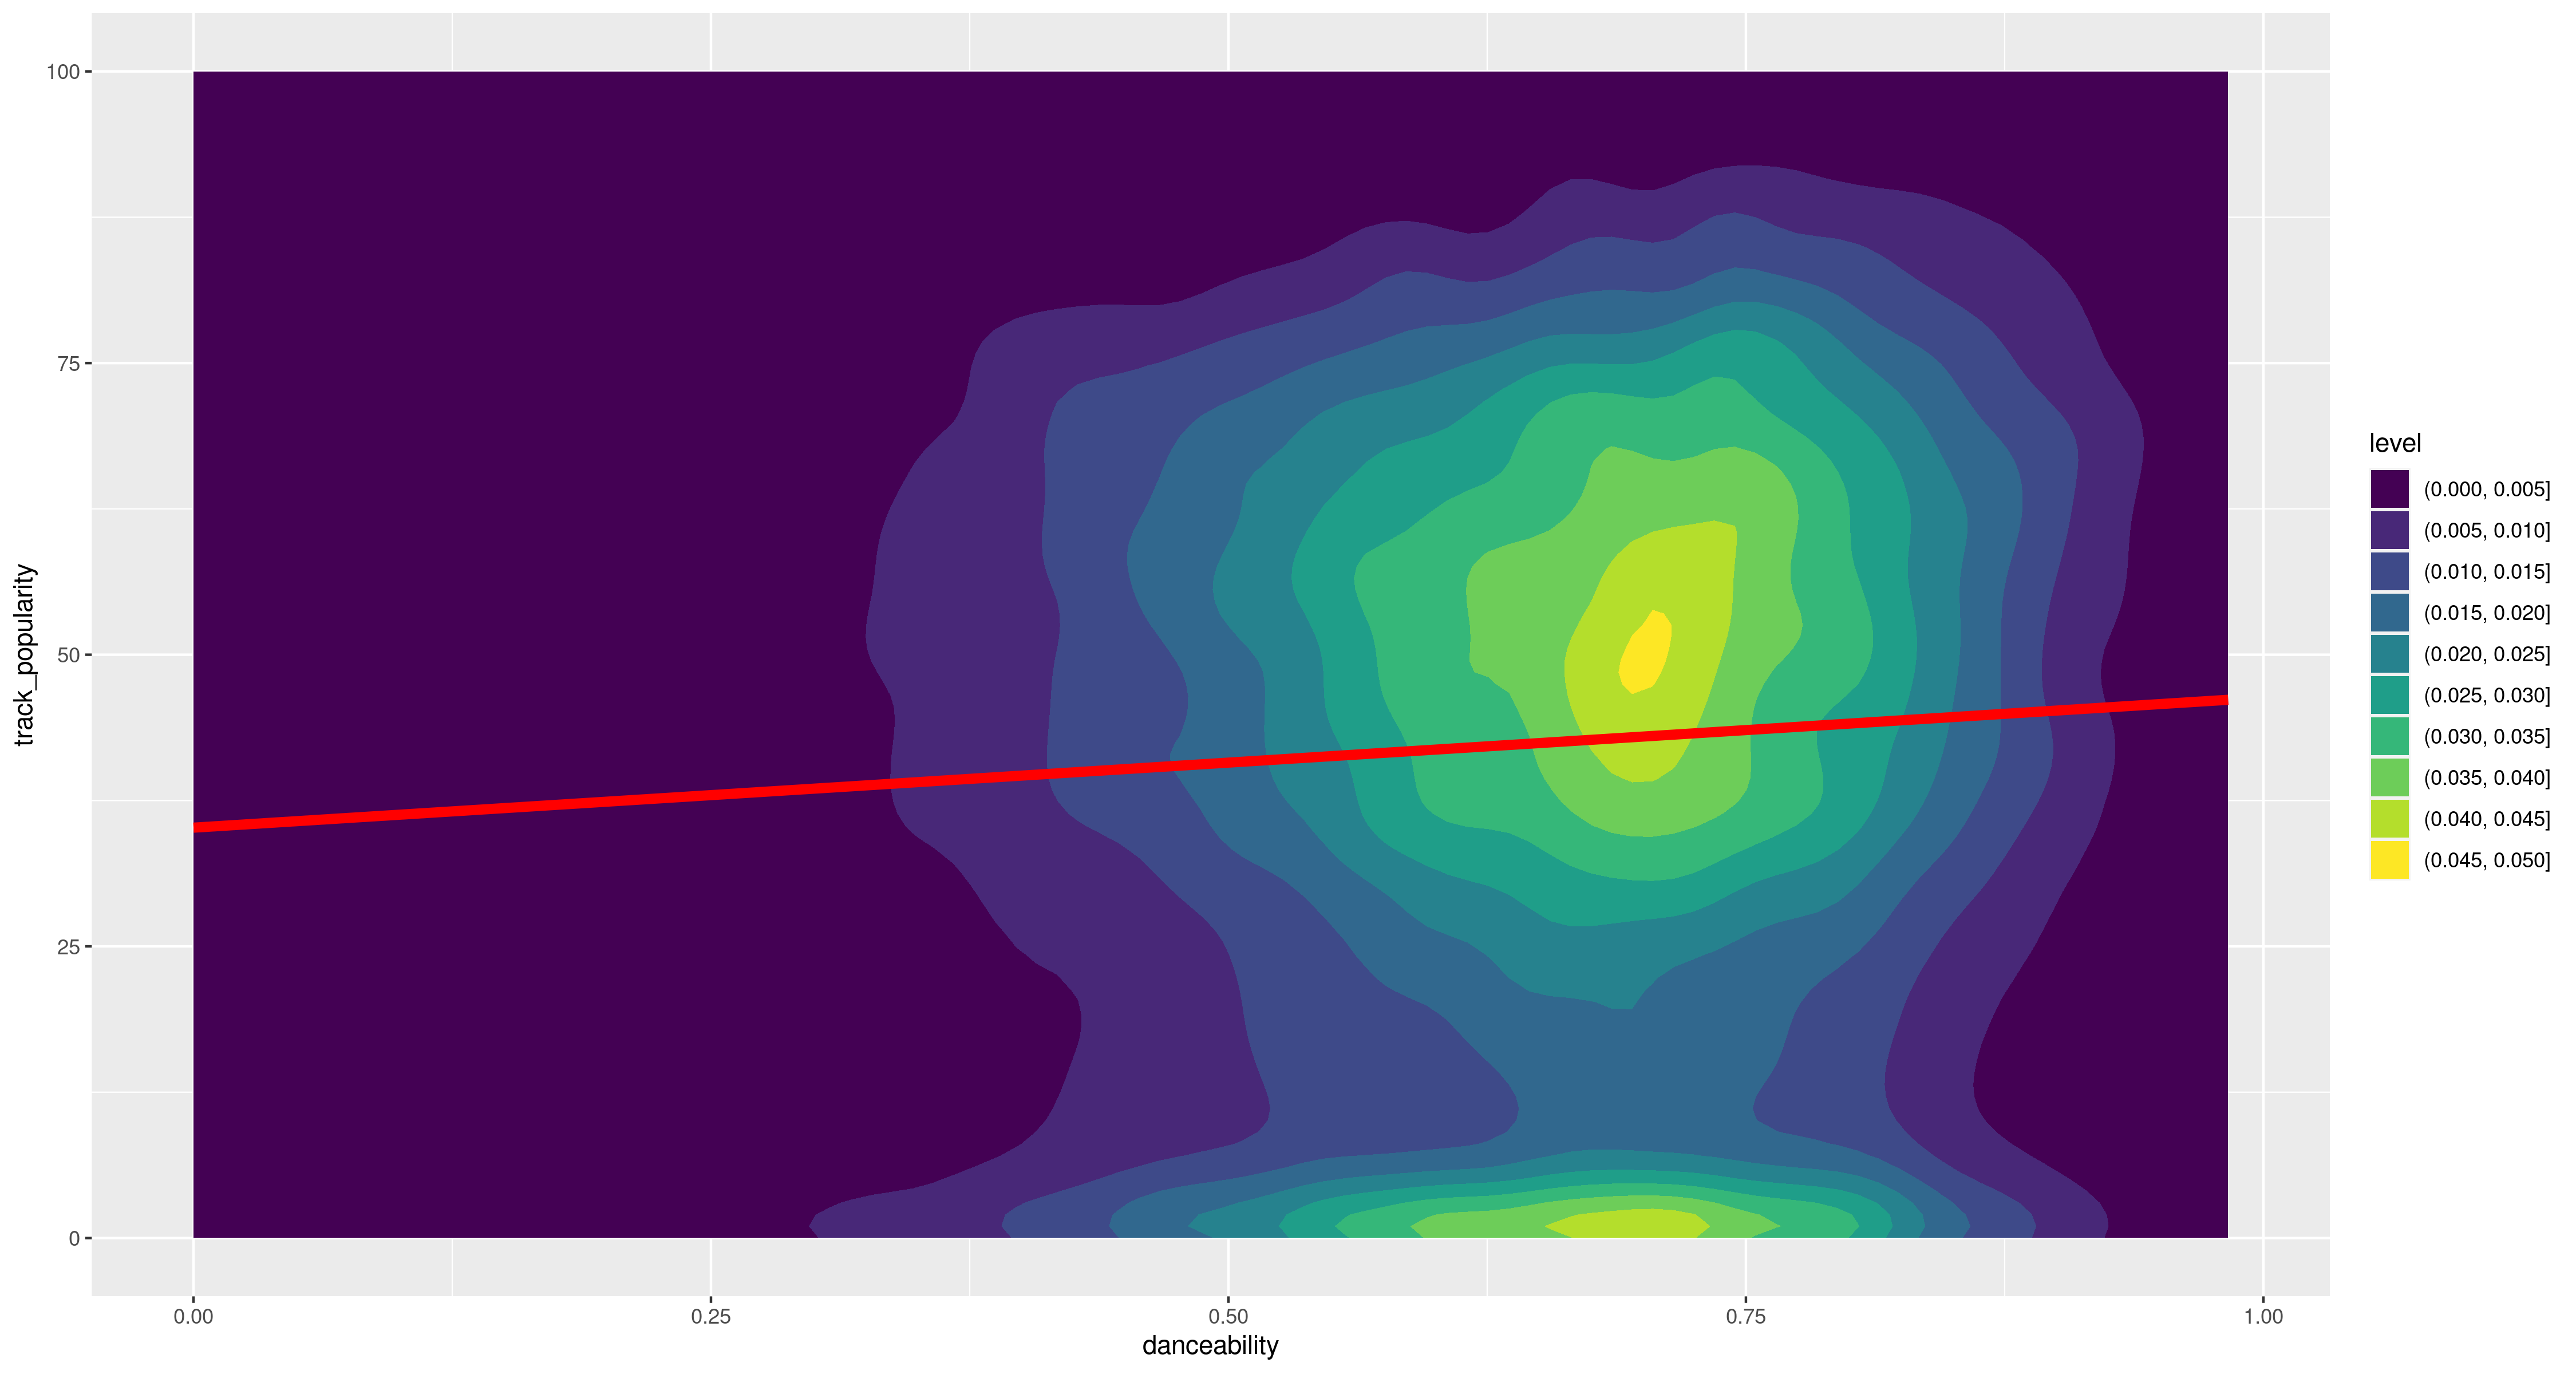

In [6]:
reg_small <- lm(track_popularity ~ danceability, spotify_df)
print(summary(reg_small))

ggplot(spotify_df) +
    geom_density_2d_filled(aes(y=track_popularity, x=danceability)) +
    geom_line(aes(x=danceability, y=reg_small$fitted.values), color="red", linewidth=2)
  

# Bodyfat

Source:
https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset

## Motivation

Measuring bodyfat precisely is hard, and proxies are very useful. Can we
predict the outcome of an expensive, inconvenient procedure using only
easy-to-gather measurements?

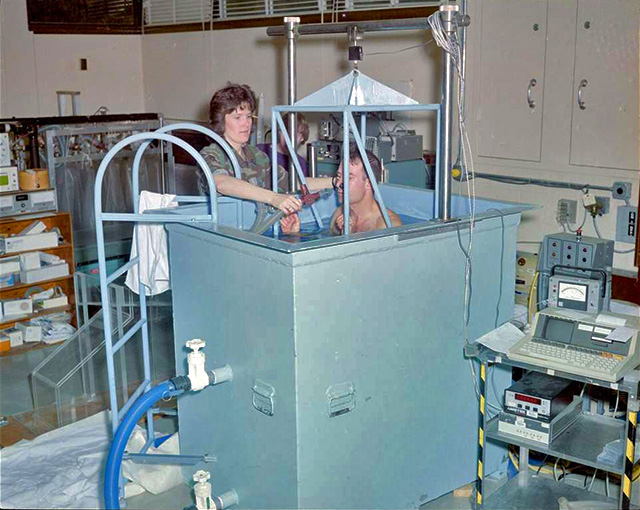

Image from https://www.topendsports.com/testing/tests/underwater.htm

In [7]:
bodyfat_df <- read.csv("datasets/bodyfat.csv")
head(bodyfat_df)
nrow(bodyfat_df)

252

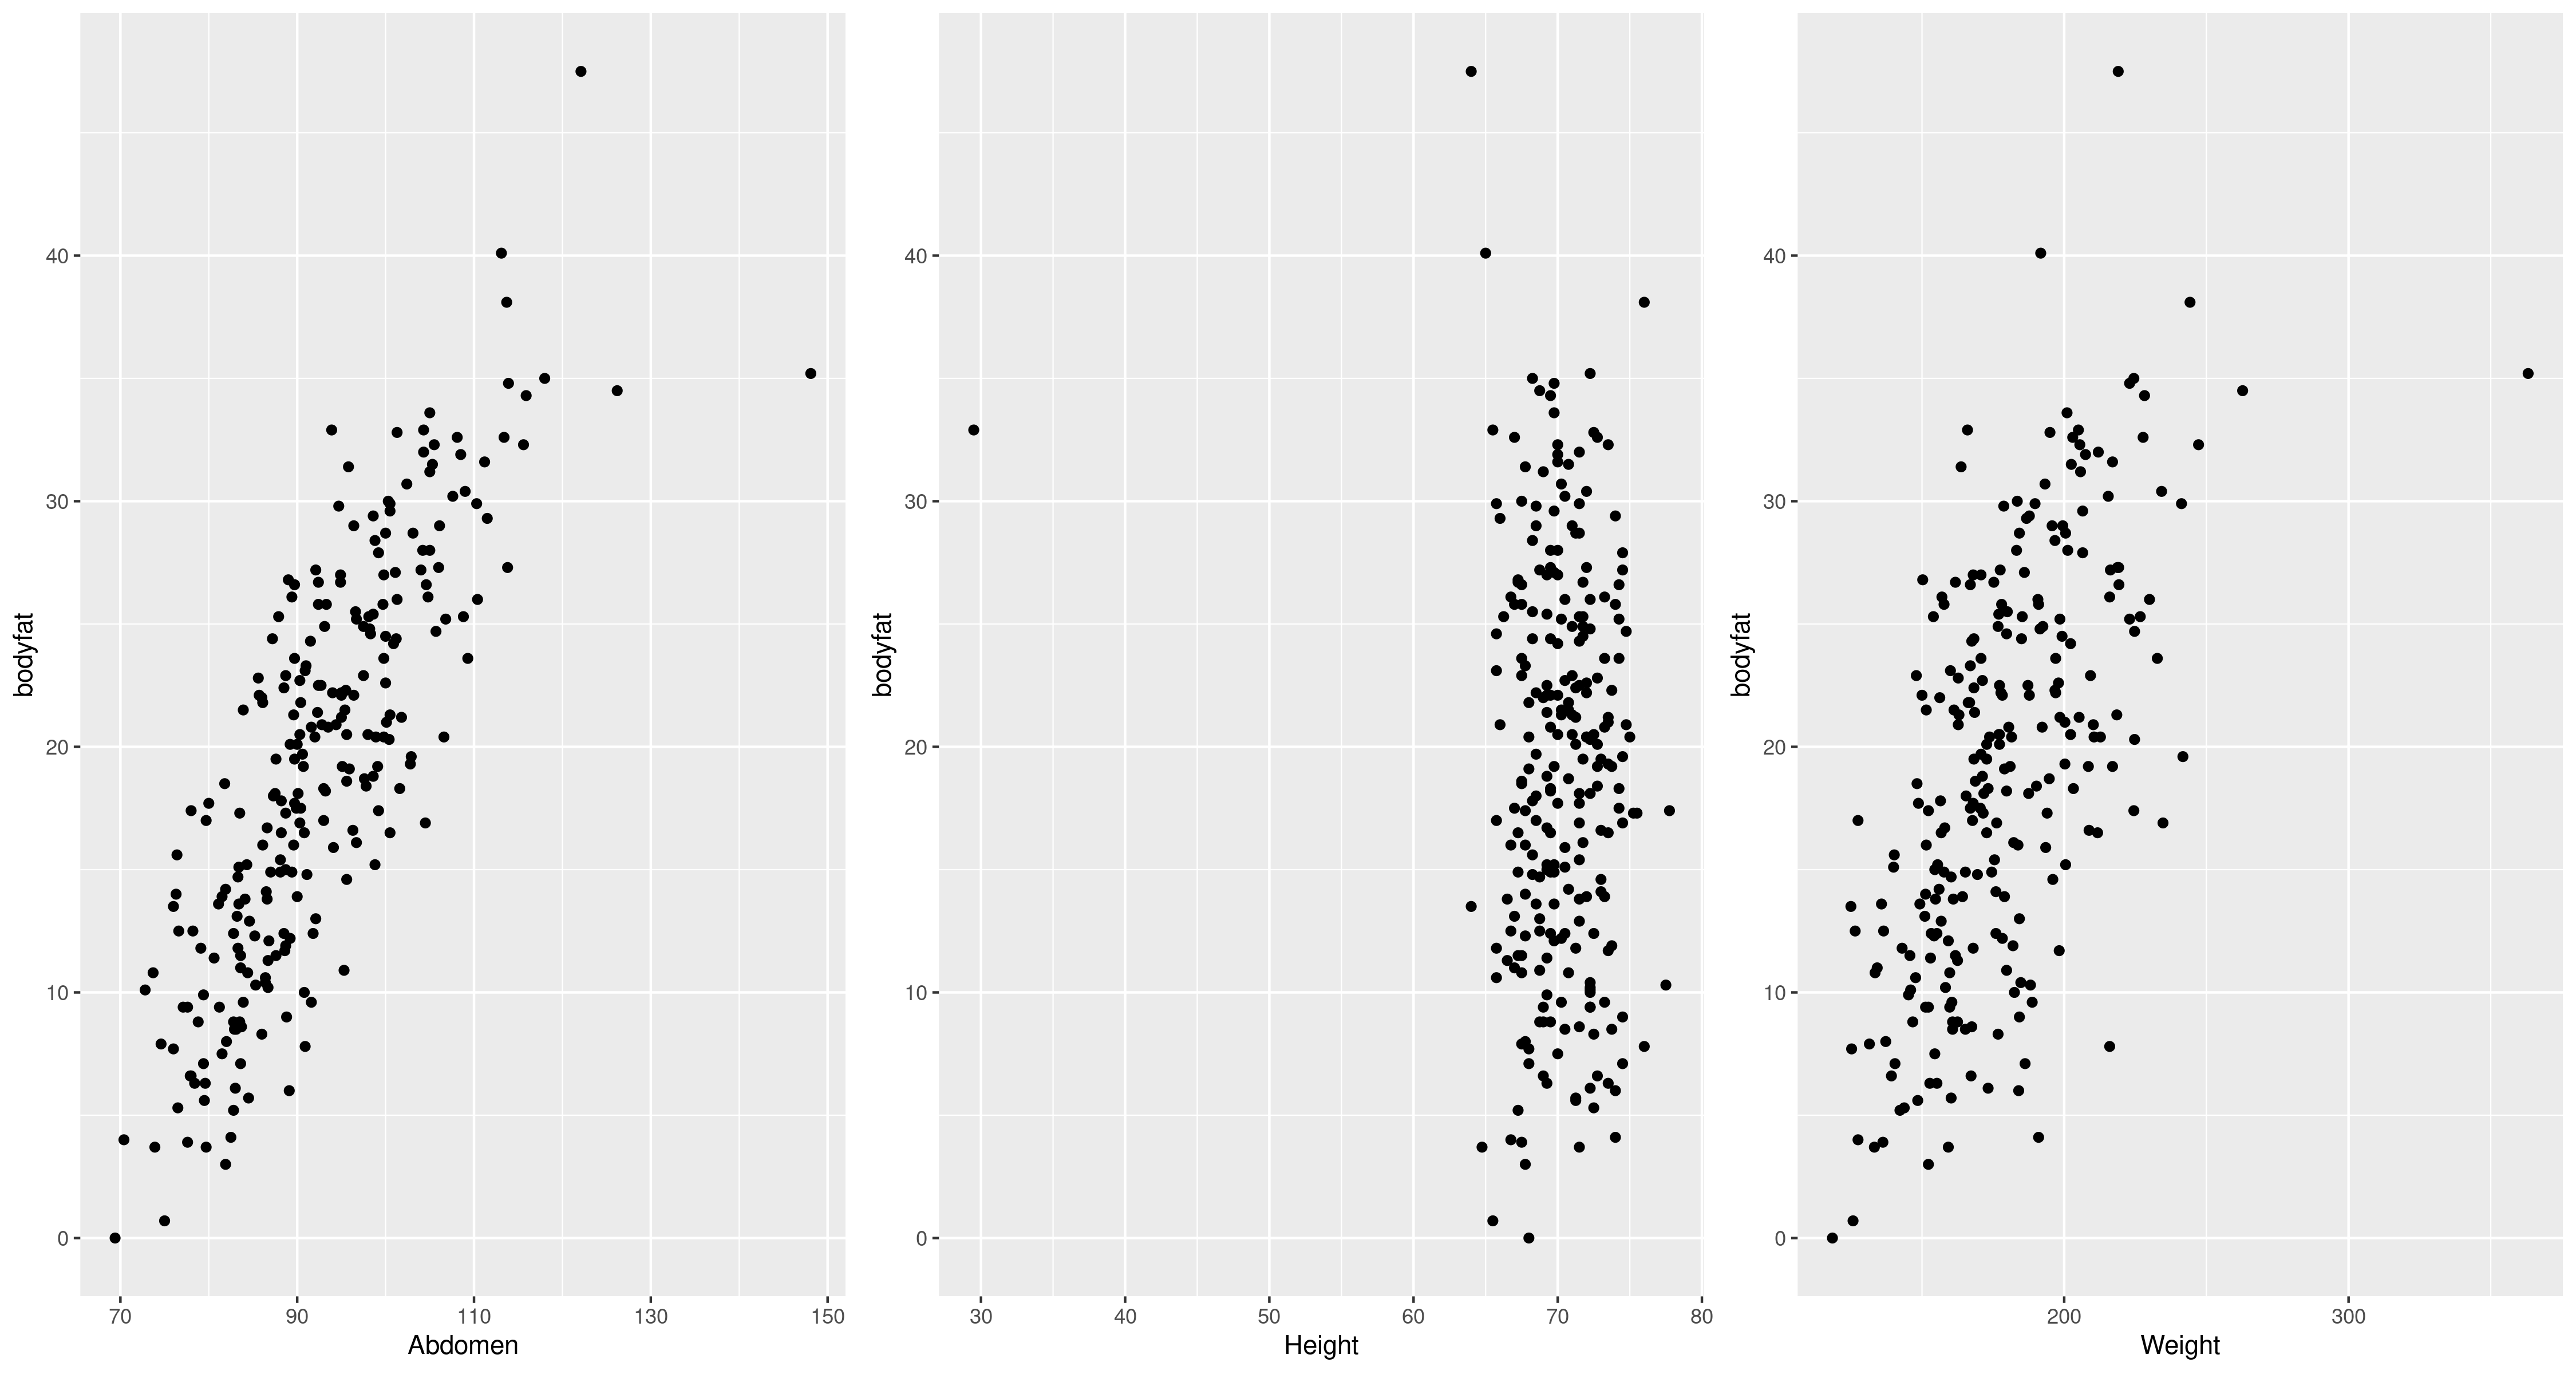

In [8]:
vars <- c("Weight", "Height", "Neck", "Chest", "Abdomen", "Hip", 
          "Thigh", "Knee", "Ankle", "Biceps", "Forearm", "Wrist")
stopifnot(all(vars %in% names(bodyfat_df)))

grid.arrange(
    ggplot(bodyfat_df) + geom_point(aes(x=Abdomen, y=bodyfat)),
    ggplot(bodyfat_df) + geom_point(aes(x=Height, y=bodyfat)),
    ggplot(bodyfat_df) + geom_point(aes(x=Weight, y=bodyfat)),
    ncol=3)


Call:
lm(formula = reg_form, data = bodyfat_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4341  -3.0551  -0.0158   3.1951   9.7682 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -19.54803   17.43111  -1.121   0.2632    
Weight       -0.10974    0.05266  -2.084   0.0382 *  
Height       -0.09410    0.09569  -0.983   0.3264    
Neck         -0.42995    0.23280  -1.847   0.0660 .  
Chest        -0.01728    0.09964  -0.173   0.8625    
Abdomen       1.02953    0.07761  13.266   <2e-16 ***
Hip          -0.22995    0.14626  -1.572   0.1172    
Thigh         0.13476    0.13510   0.997   0.3195    
Knee          0.13187    0.23554   0.560   0.5761    
Ankle         0.12974    0.22150   0.586   0.5586    
Biceps        0.20538    0.17163   1.197   0.2326    
Forearm       0.38964    0.19756   1.972   0.0497 *  
Wrist        -1.27227    0.50602  -2.514   0.0126 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual

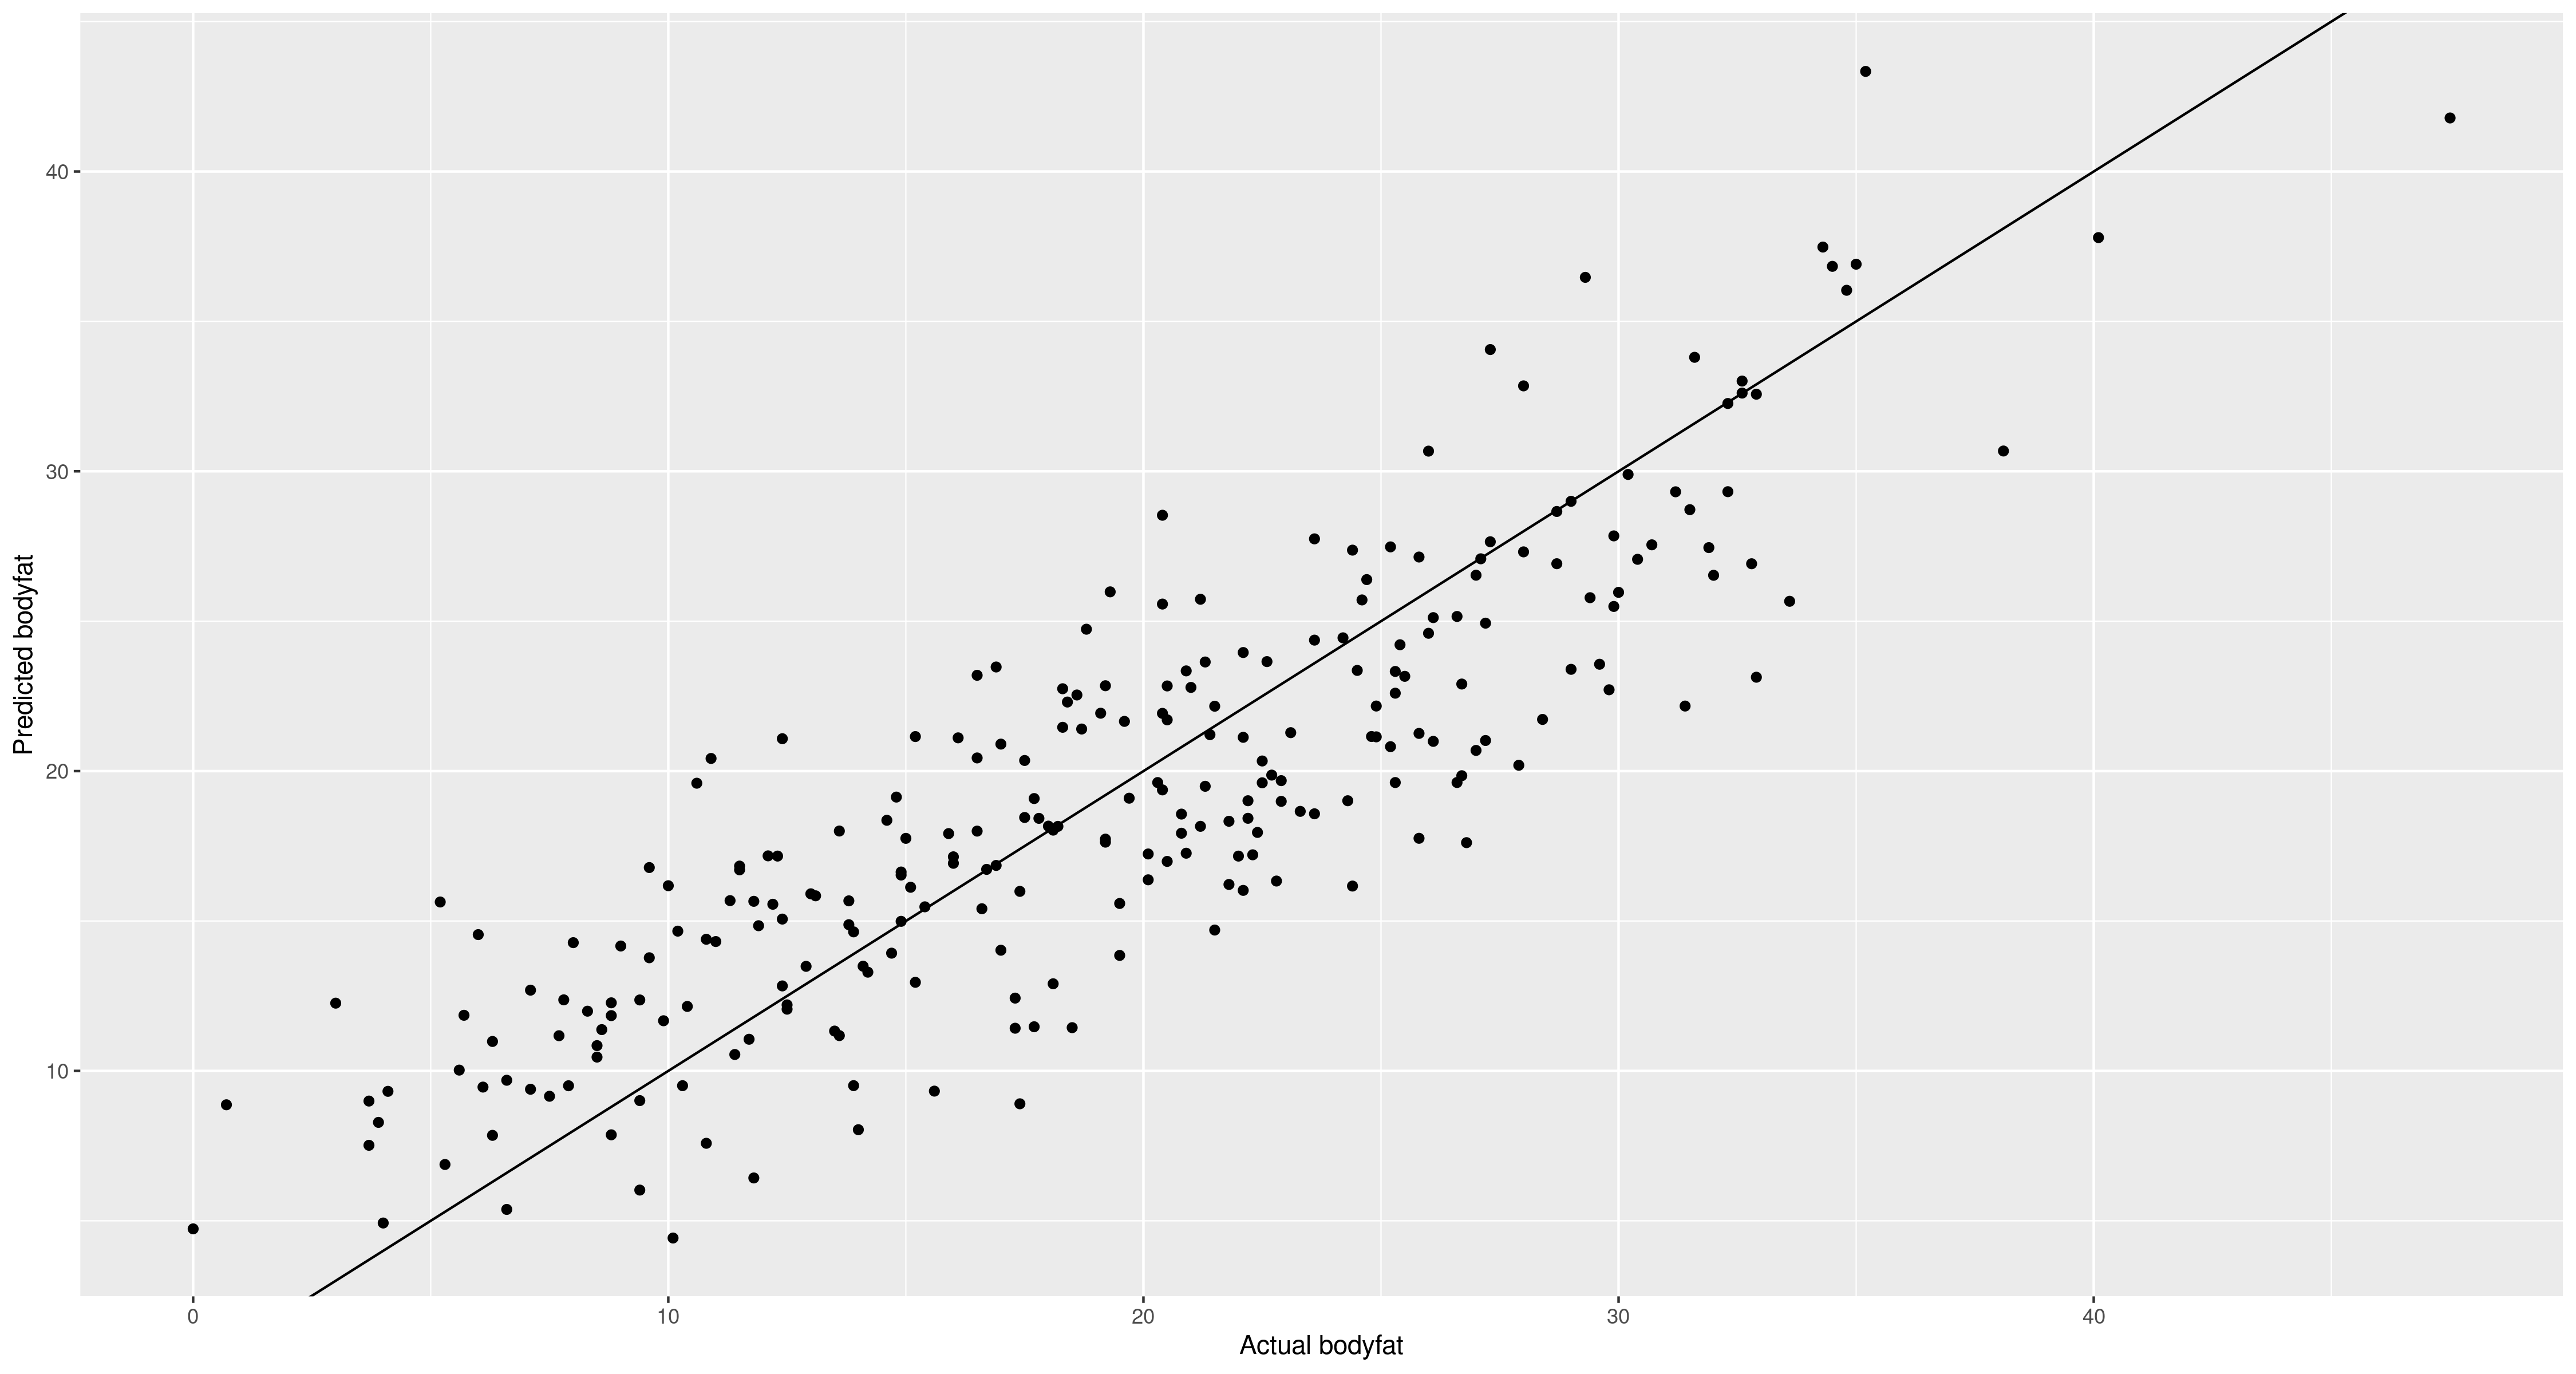

In [9]:
regressors <- paste(vars, collapse=" + ")
reg_form <- formula(paste0("bodyfat ~ 1 + ", regressors))
reg <- lm(reg_form, bodyfat_df)
summary(reg)

ggplot() +
    geom_point(aes(x=bodyfat_df$bodyfat, y=reg$fitted.values)) +
    geom_abline(aes(slope=1, intercept=0)) +
    xlab("Actual bodyfat") + ylab("Predicted bodyfat")

# Aluminum

Stress-strain plots of AL data. For a given amount of force, how much
does a bar of aluminum deform?

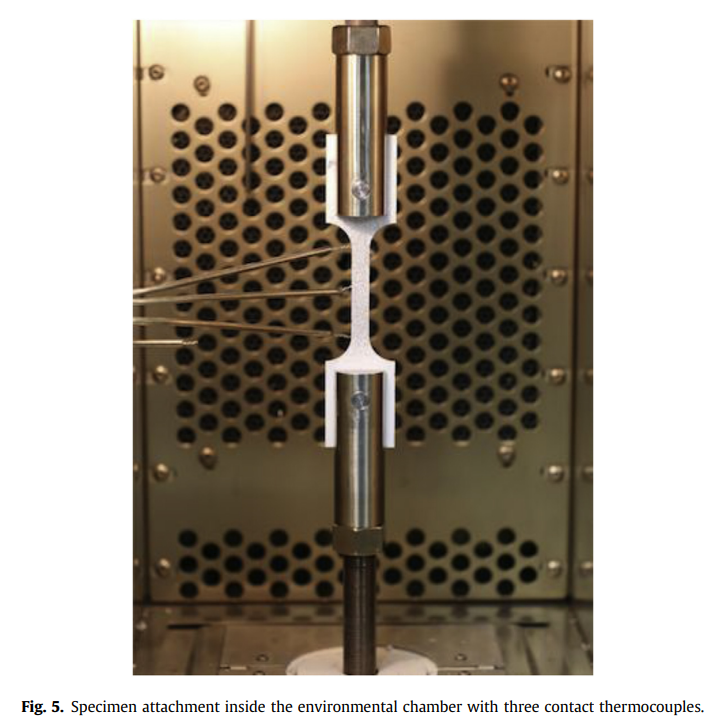

Taken from https://data.mendeley.com/datasets/rd6jm9tyb6/2

See paper and methods at
https://www.sciencedirect.com/science/article/pii/S0263823118313831?via%3Dihub

In [10]:
al_df <- read.csv(file="datasets/aluminum_dataset.csv") %>% 
  filter(loading_type == "T", temp == 20, lot == "A")
head(al_df)

In [11]:
print(table(al_df[c("lot", "specimen")]))

   specimen
lot   1   2   3
  A 614 645 630

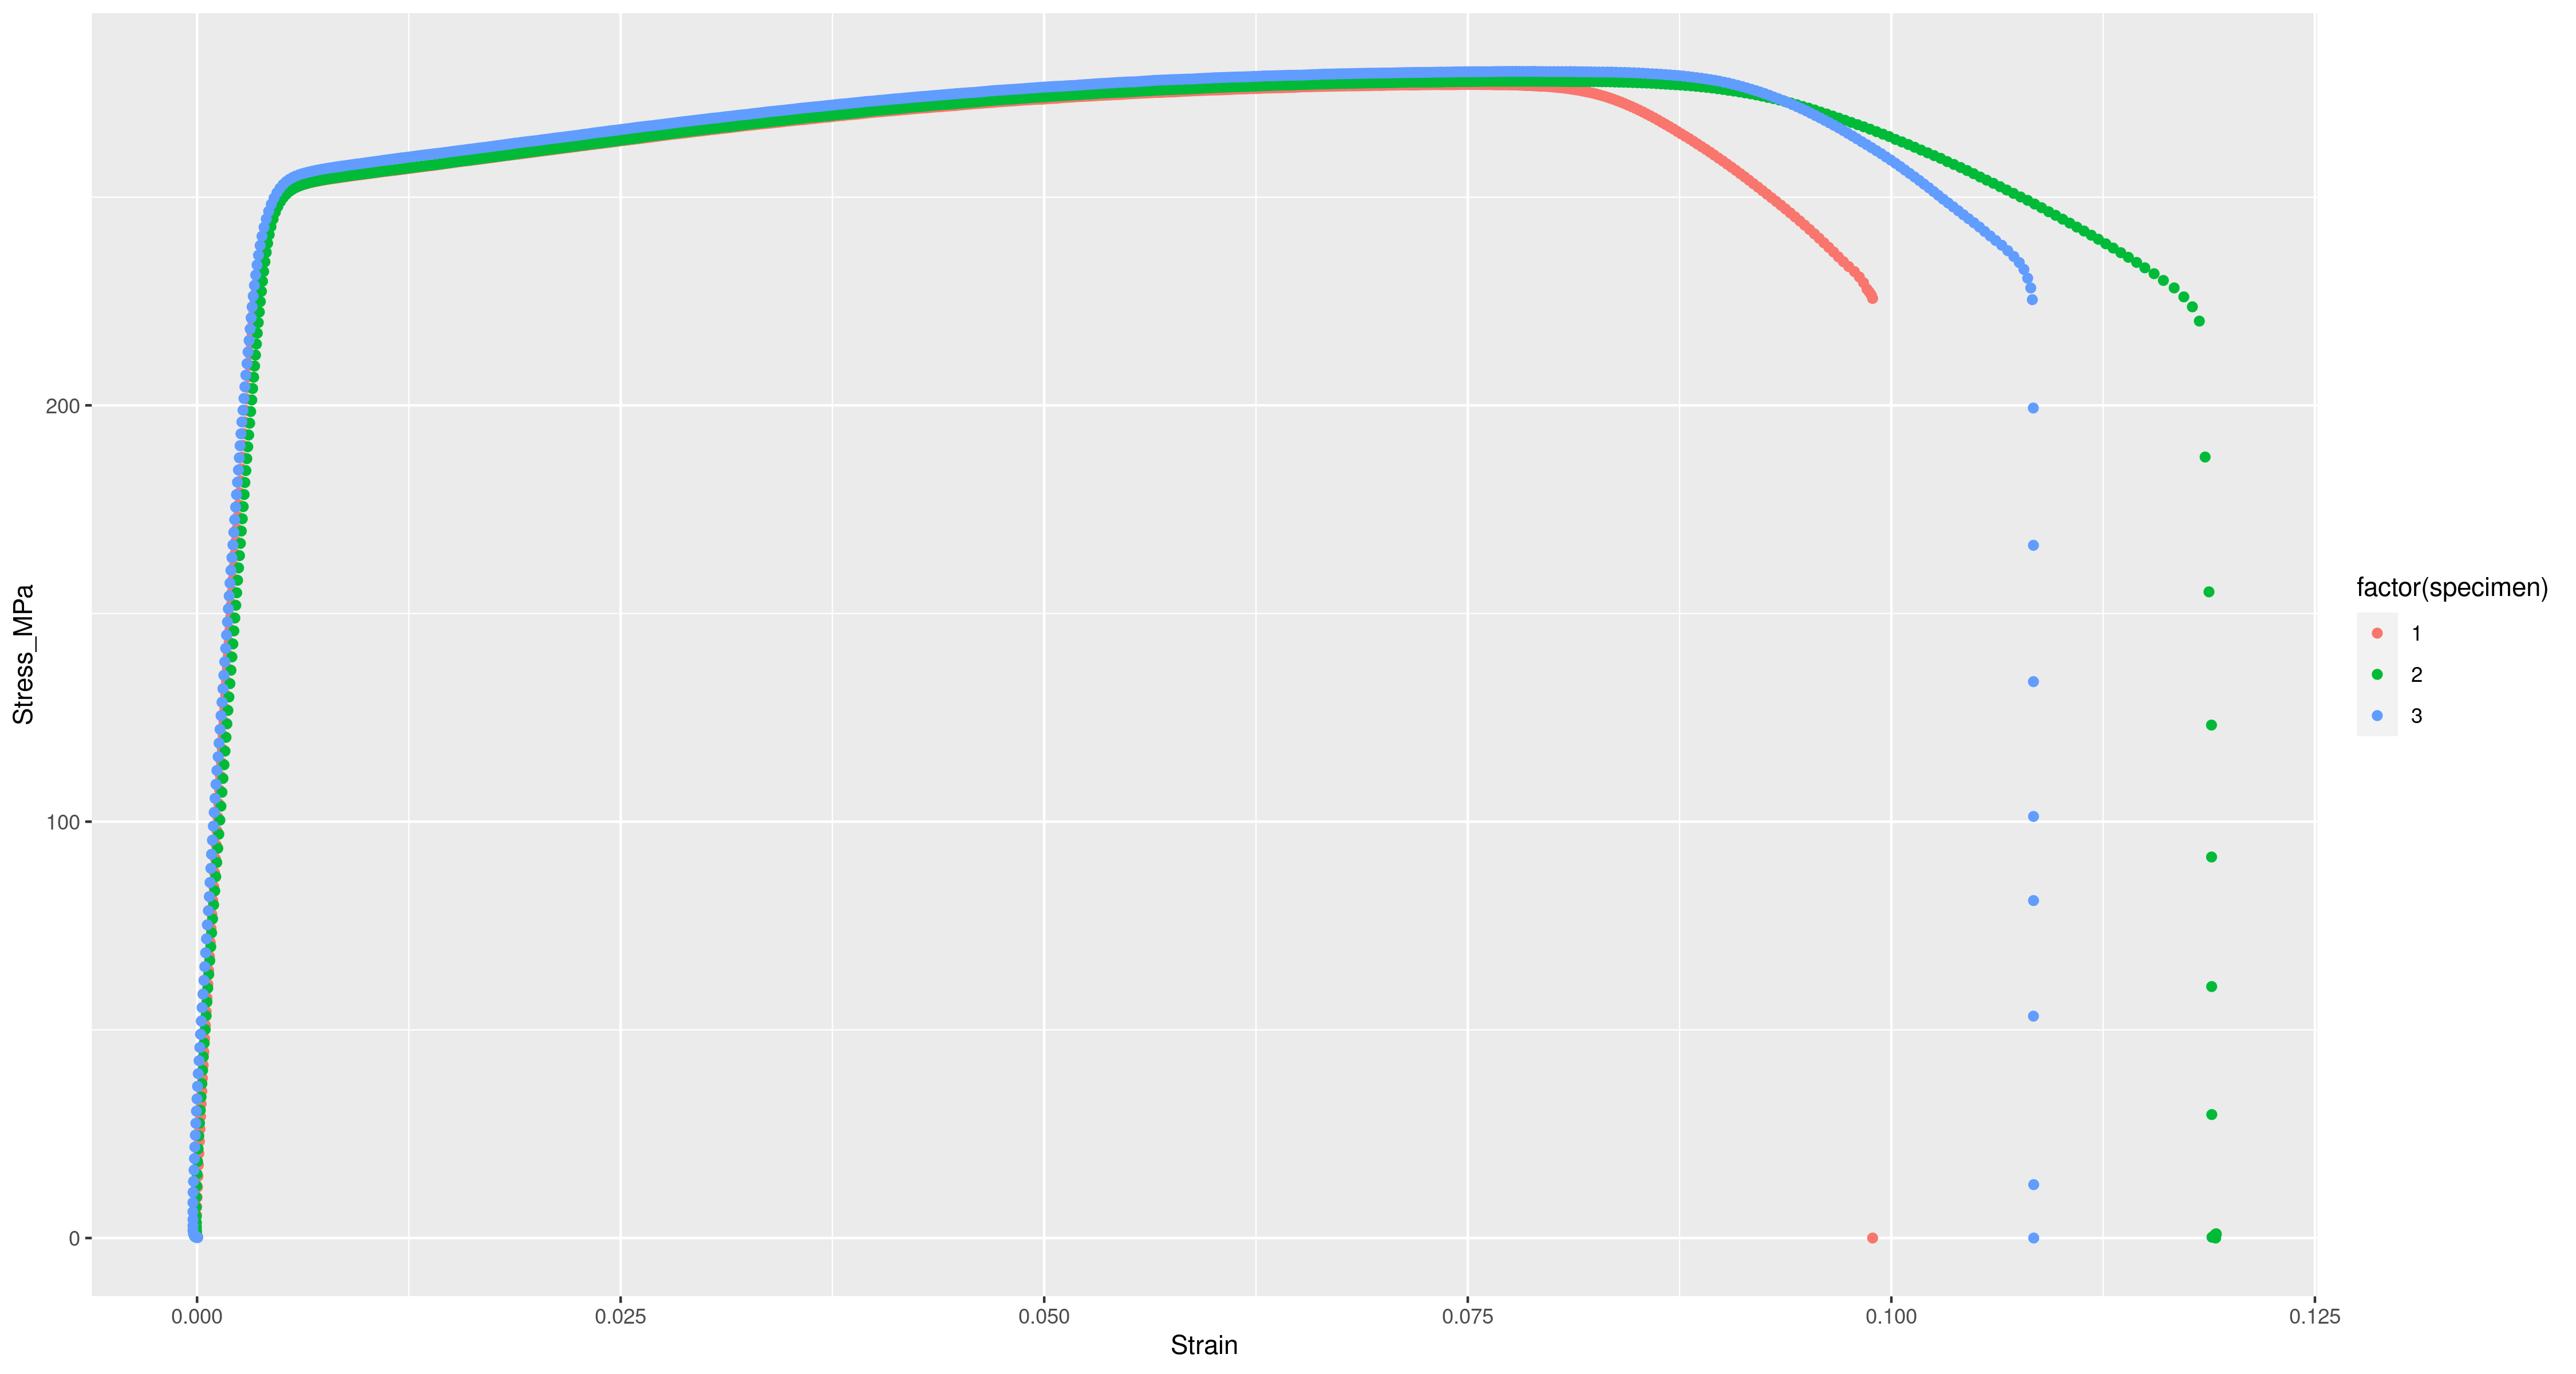

In [12]:
ggplot(al_df) +
  geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen)))

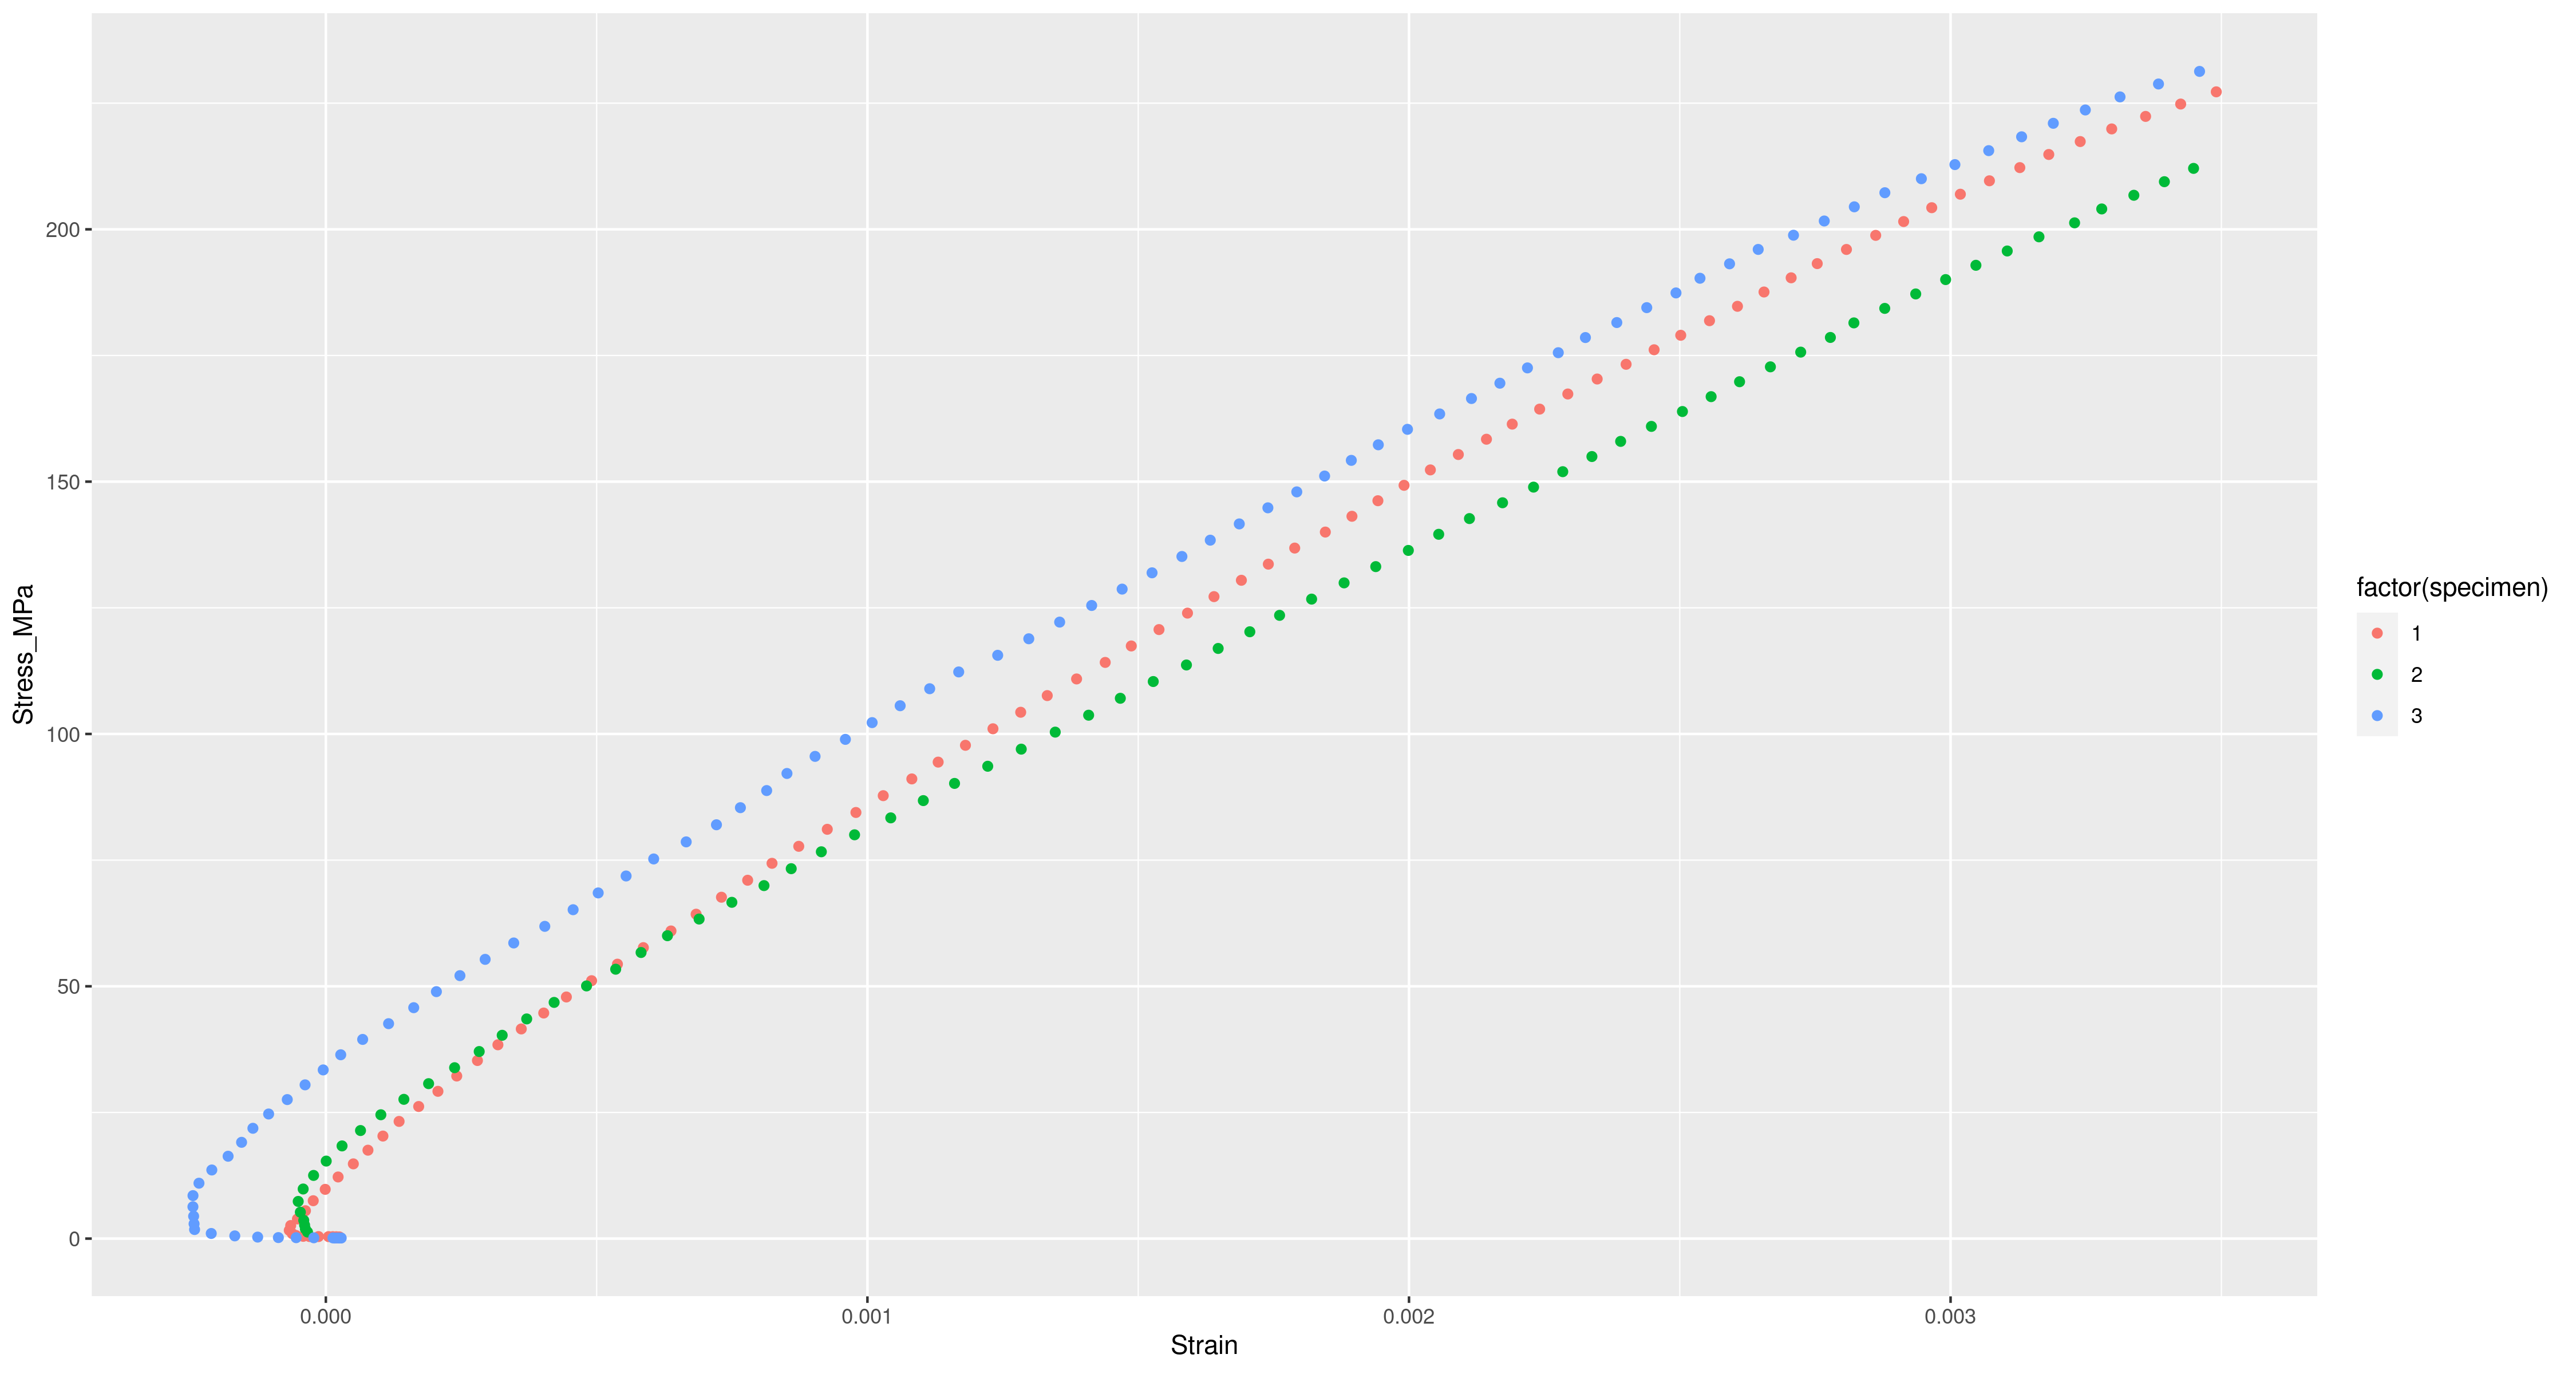

In [13]:
al_df %>% filter(Strain < 0.0035) %>%
  ggplot() +
    geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen)))

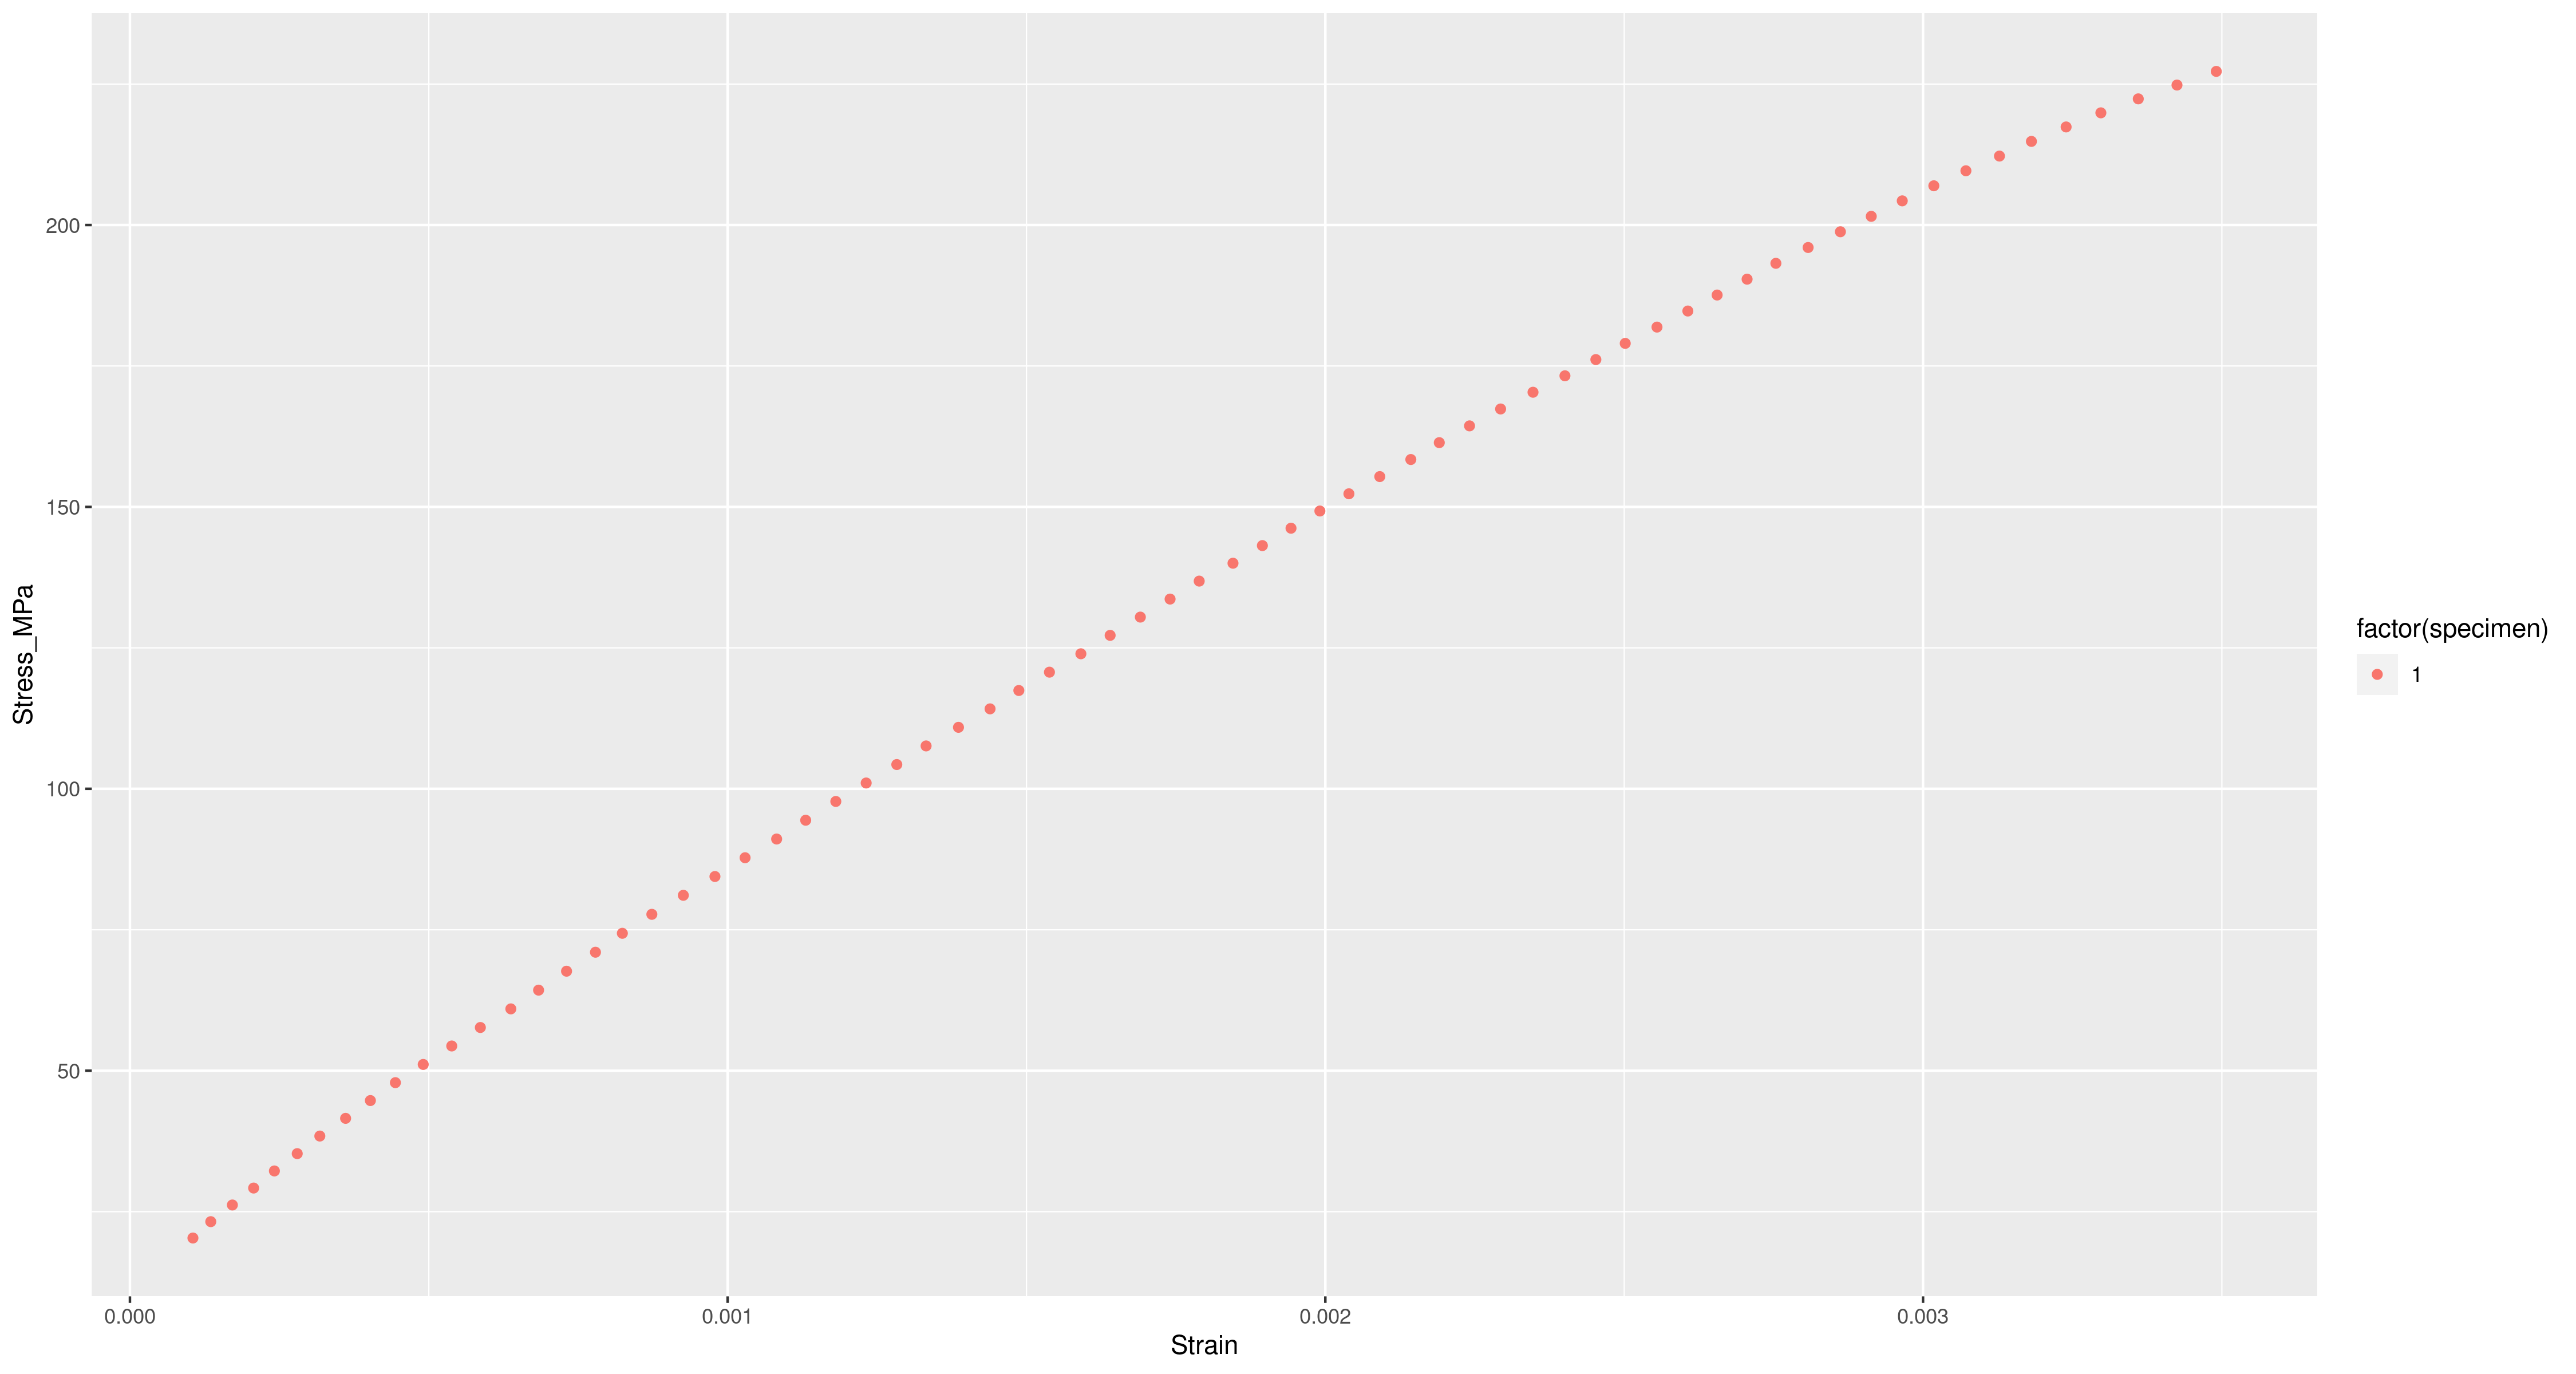

In [14]:
al_reg_df <- al_df %>% filter(Strain < 0.0035, Strain > 0.0001, specimen == 1)
ggplot(al_reg_df) +
  geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen)))

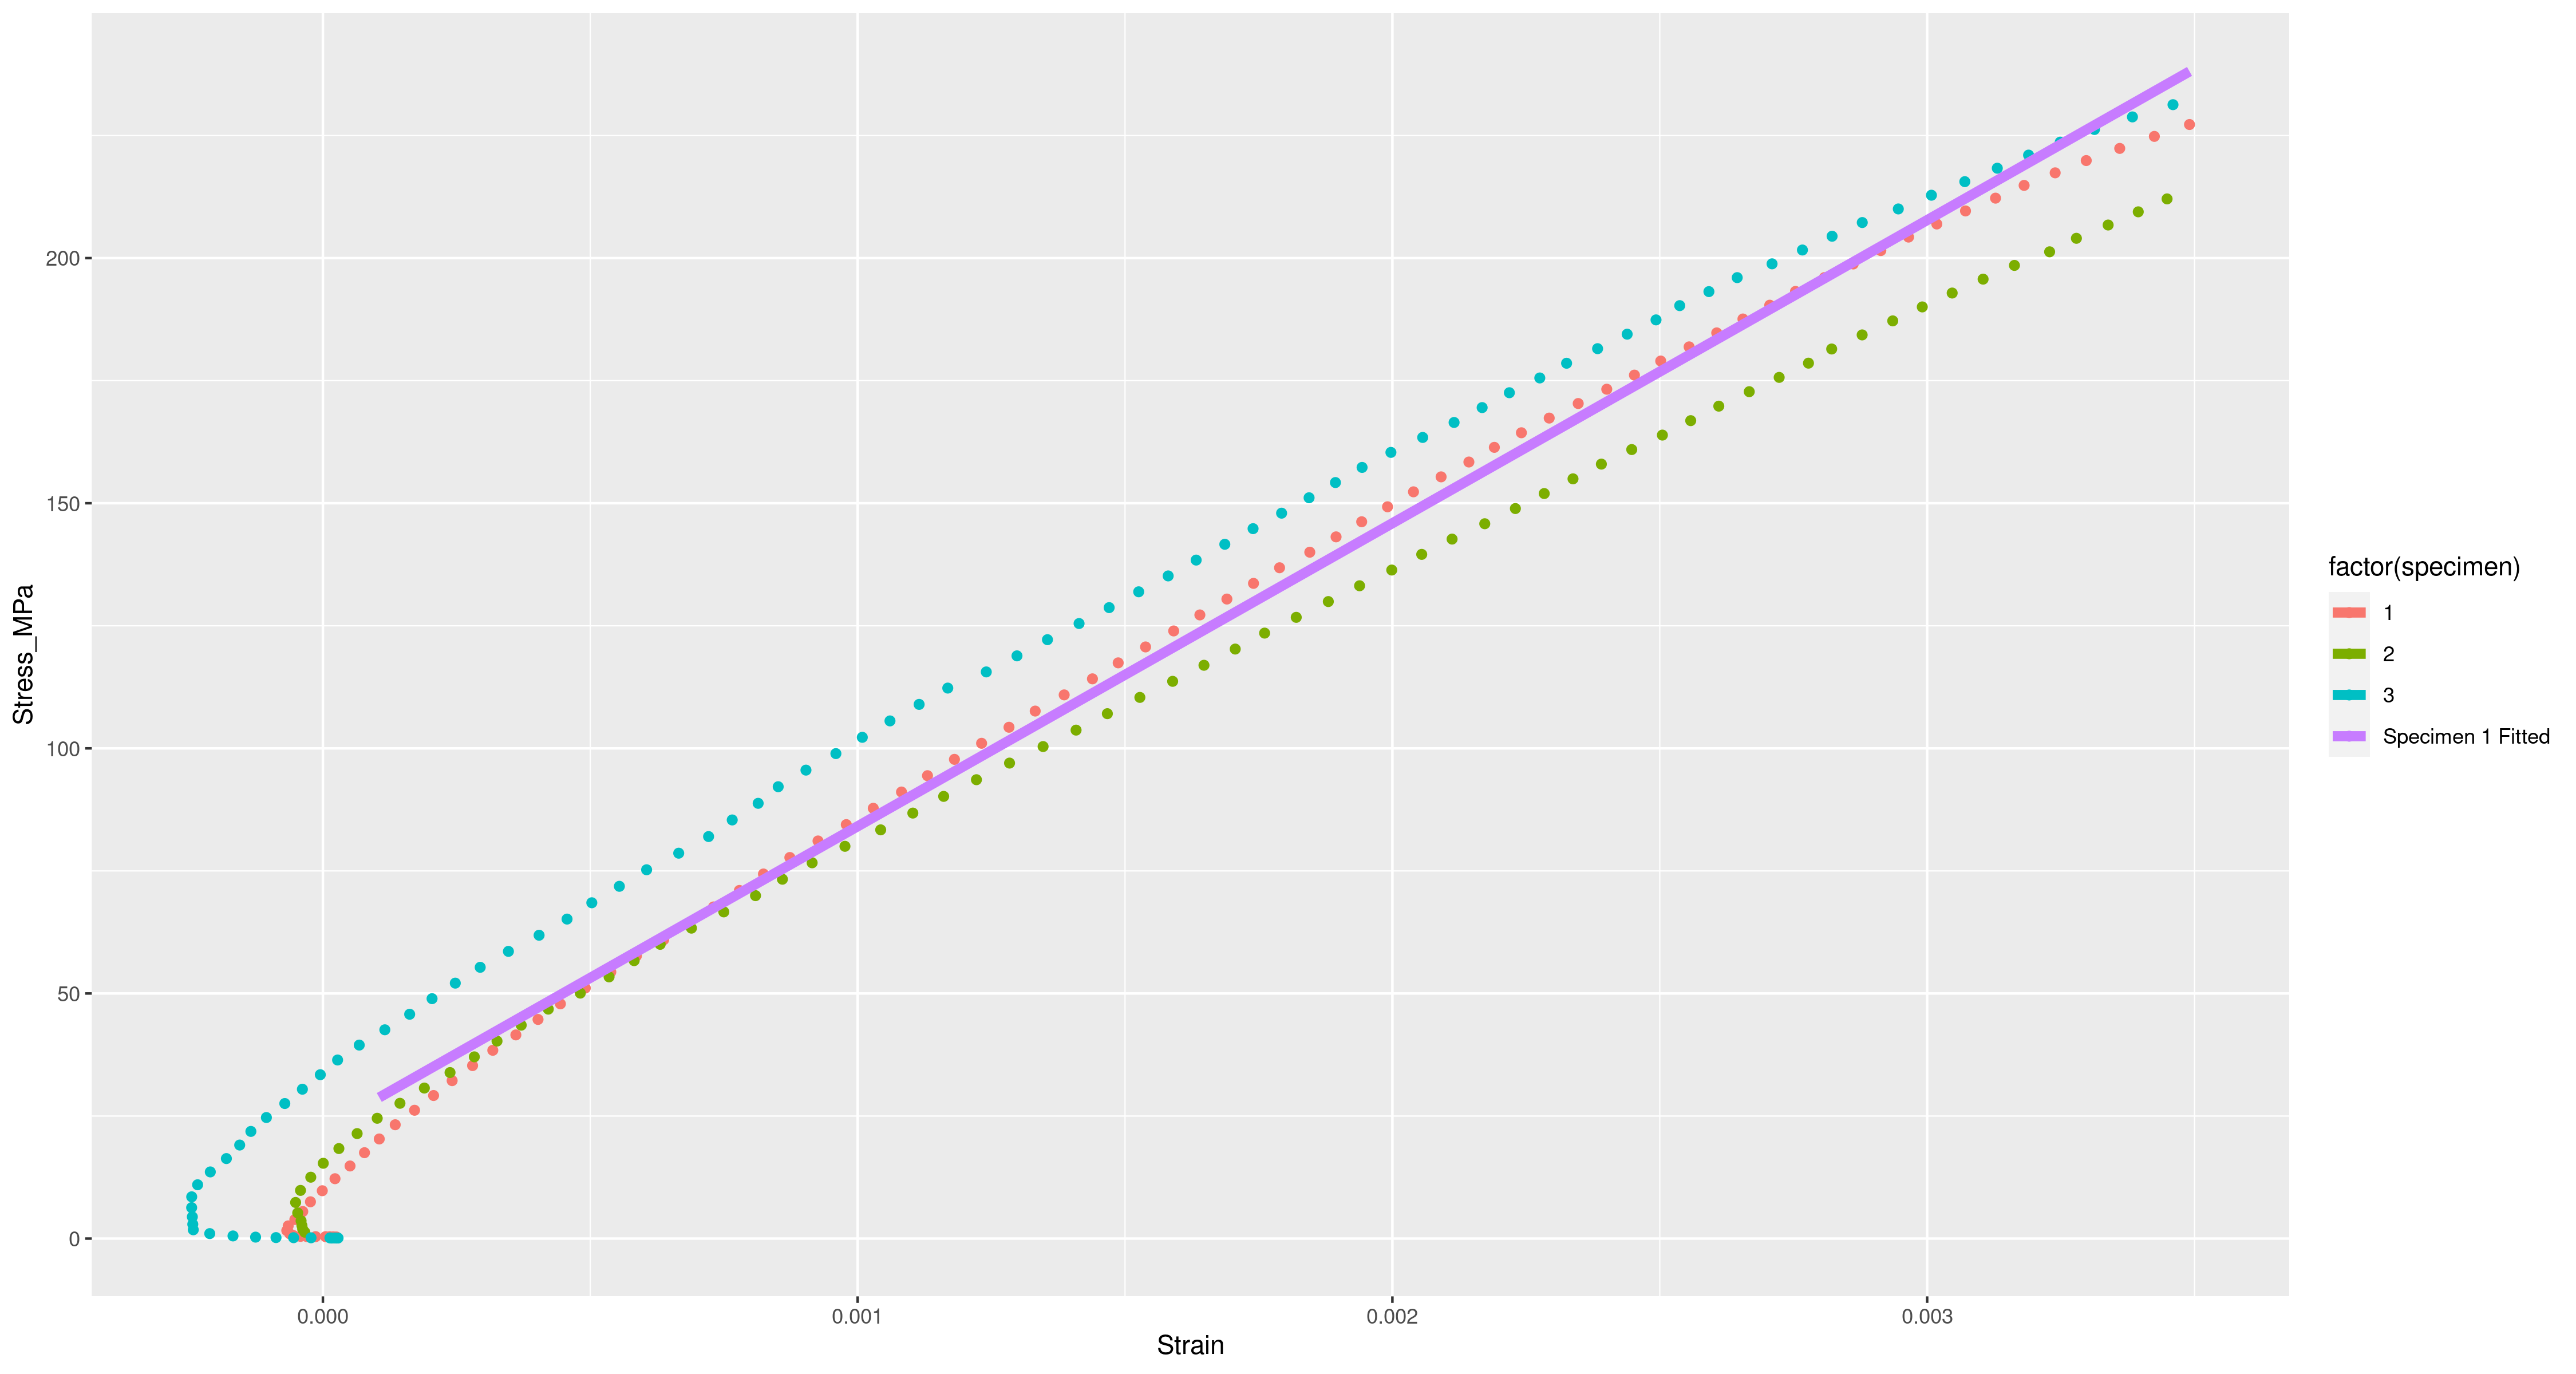

In [15]:
reg <- lm(Stress_MPa ~ 1 + Strain, al_reg_df)
al_reg_df$fit <- reg$fitted.values
al_df %>% filter(Strain < 0.0035) %>%
  ggplot() +
    geom_point(aes(x=Strain, y=Stress_MPa, color=factor(specimen))) +
    geom_line(aes(x=Strain, y=fit, color="Specimen 1 Fitted"), lwd=2, data=al_reg_df)